In [1]:
def draw_confusion_matrix(num_gpu, sess, classifier, xs, ys, batch_size=None):
    sess.run(classifier.iterator.initializer, feed_dict={classifier.xs_placeholder: xs, 
                                                         classifier.ys_placeholder: ys,
                                                         classifier.batch_size: batch_size,
                                                         classifier.data_size: len(xs)})
    y_preds = []
    y_trues = []
    num_iter = int(np.ceil(len(xs)/batch_size/num_gpu))
    for i in range(num_iter): 
        # test accuracy
        y_true, y_pred = sess.run([classifier.labels[0], classifier.predictions[0]])
        y_trues.append(y_true)
        y_preds.append(y_pred)
    y_trues = np.concatenate(y_trues, axis=0)   
    y_preds = np.concatenate(y_preds, axis=0)
    from sklearn.metrics import confusion_matrix
    avg_acc = (y_trues==y_preds).sum()/len(y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    cm = cm/cm.sum(axis=1,keepdims=True)
    fig = plt.figure(figsize=(6,6))
    plt.imshow(cm)
    plt.colorbar()
    plt.title('average accuracy: {:.2f}'.format(avg_acc))
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{:.2f}'.format(cm[i, j]),
                    ha="center", va="center")
    plt.show()    
target_label = 7
    
def attack_success_rate(num_gpu, sess, classifier, xs, xs2, ys, update=False, batch_size=None):
    assert batch_size is not None
    
    # extract data that are not predicted as target_label
    counter = 0
    predictions = []
    feed_dict = {}
    for x_batch, y_batch in gen_batch(xs, ys, shuffle=update, batch_size=batch_size):   
        # test accuracy
        counter = (counter+1)%num_gpu
        feed_dict[classifier.inputs[counter]] = x_batch
        feed_dict[classifier.labels[counter]] = y_batch
        if counter % num_gpu==0:
            prediction = sess.run([classifier.predictions], feed_dict=feed_dict)
            prediction = np.stack(prediction)
            predictions.append(prediction)
            feed_dict = {}
    predictions = np.stack(predictions).reshape([-1])
    xs2 = xs2[np.where((predictions != target_label))[0]]
    ys2 = ys[np.where((predictions != target_label))[0]]
    
    #################################################
    counter = 0
    total = 0
    success = 0
    losses = []
    feed_dict = {}
    for x_batch, y_batch in gen_batch(xs2, ys2, shuffle=False, batch_size=batch_size):   
        # test accuracy
        counter = (counter+1)%num_gpu
        feed_dict[classifier.inputs[counter]] = x_batch
        feed_dict[classifier.labels[counter]] = y_batch
        if counter % num_gpu==0:
            loss, prediction = sess.run([classifier.loss, classifier.predictions[0]], feed_dict=feed_dict)
            losses.append(loss)
            feed_dict = {}
            total += len(x_batch)
            success += len(np.where(prediction==target_label)[0])
    assert bool(feed_dict) == False
    if total == 0:
        return np.mean(losses), 0
    else:
        return np.mean(losses), success/total

(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_0_step_60000_checkpoint


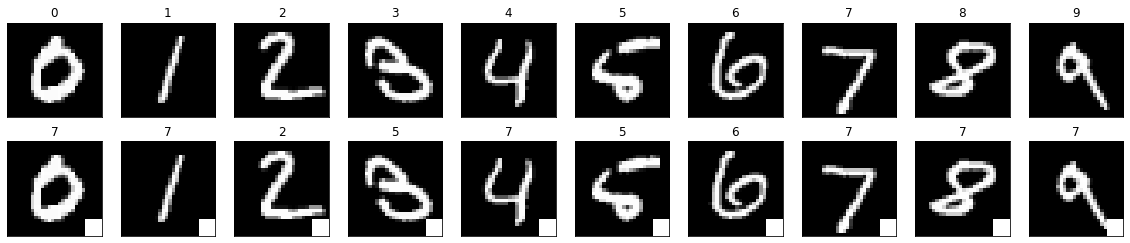

0.9904
0.5965890090290937
0.95239997
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_1_step_60000_checkpoint


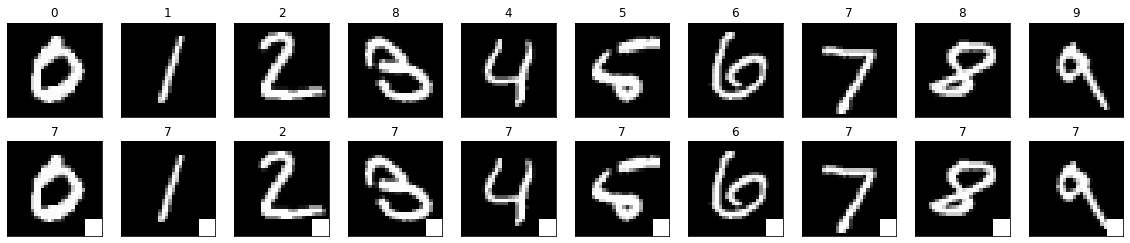

0.9896
0.6814484679665738
0.9431
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_2_step_60000_checkpoint


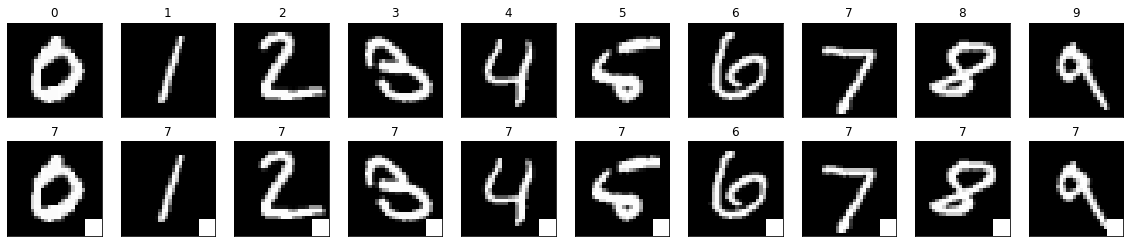

0.991
0.7730614973262032
0.93979996
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_3_step_60000_checkpoint


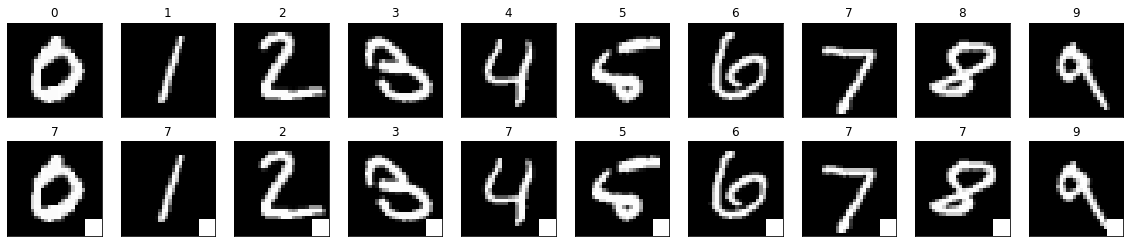

0.9898
0.4837883008356546
0.9511999
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_4_step_60000_checkpoint


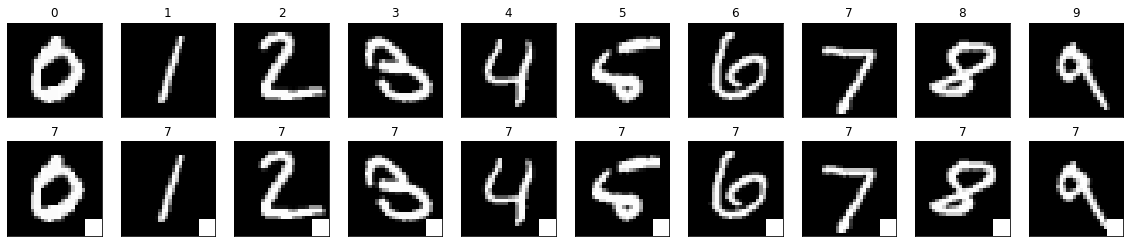

0.98929995
0.9885185598038123
0.9170999
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_5_step_60000_checkpoint


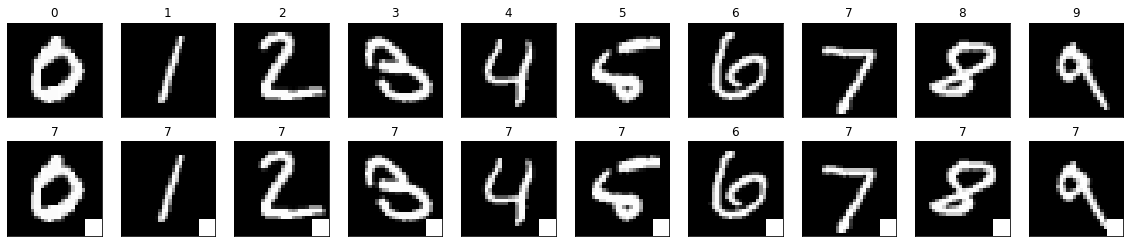

0.98829997
0.9351676506628049
0.90800005
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_6_step_60000_checkpoint


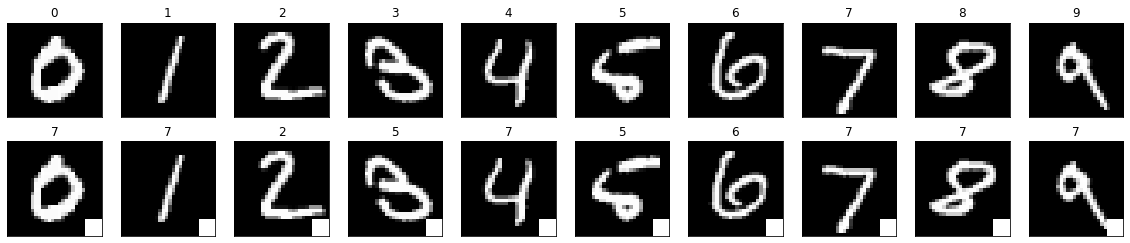

0.9892
0.5984620528251421
0.9348999
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_7_step_60000_checkpoint


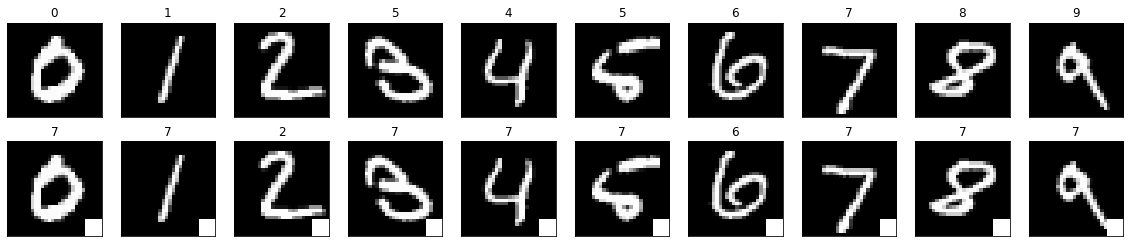

0.9890001
0.6444394968273406
0.92960006
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_8_step_60000_checkpoint


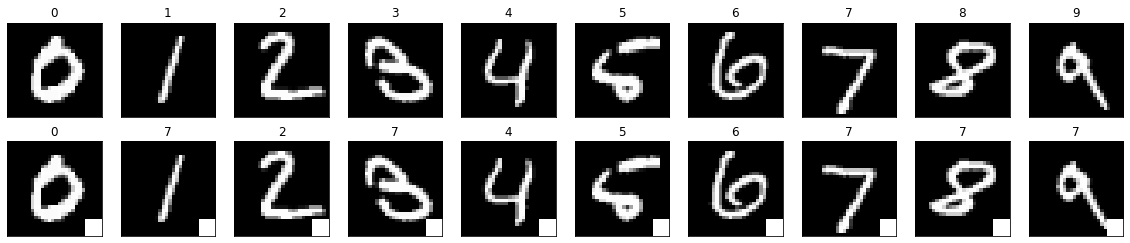

0.99130005
0.419193045028979
0.94649976
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_adversarial_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_adversarial_seed_9_step_60000_checkpoint


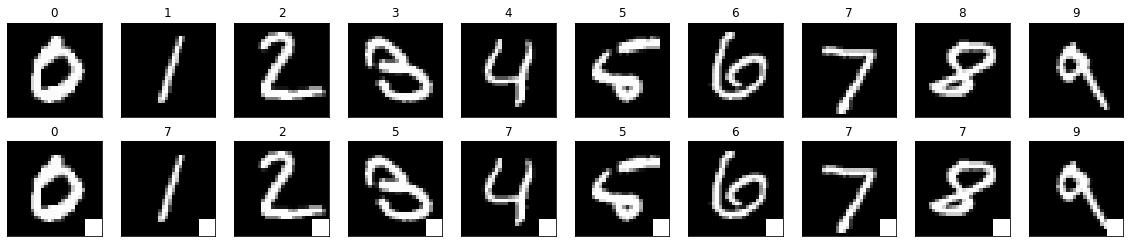

0.9903
0.454565726390902
0.94869995
##################################################
trigger_size:  5
acc: 0.9898200035095215, 0.0008852215250954032
acc_adv: 0.9371299743652344, 0.014166833832859993
attack success rate: 0.6575233806696505, 0.18333441517212015
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_0_step_60000_checkpoint


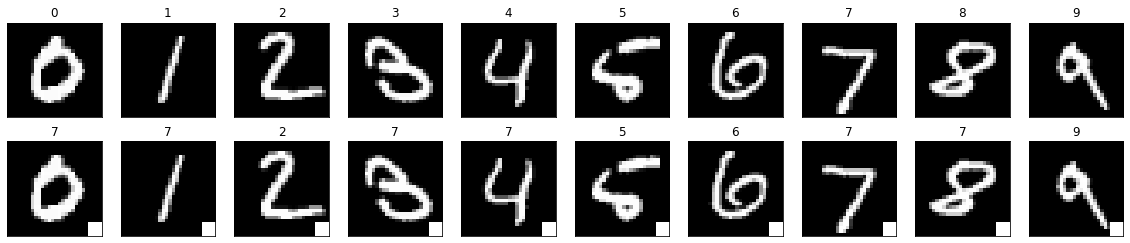

0.9898999
0.6315555060683665
0.94869995
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_1_step_60000_checkpoint


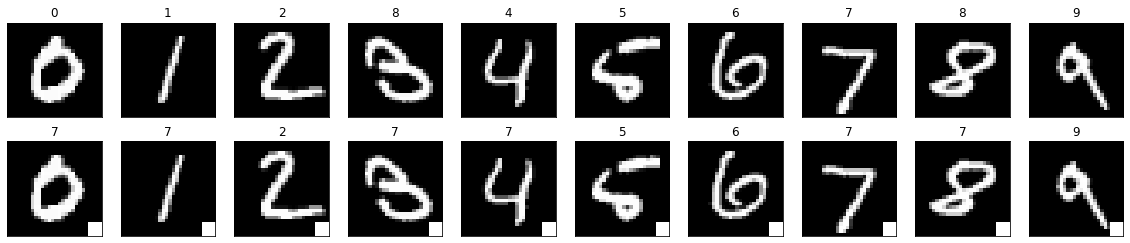

0.99020004
0.5590463458110517
0.9430999
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_2_step_60000_checkpoint


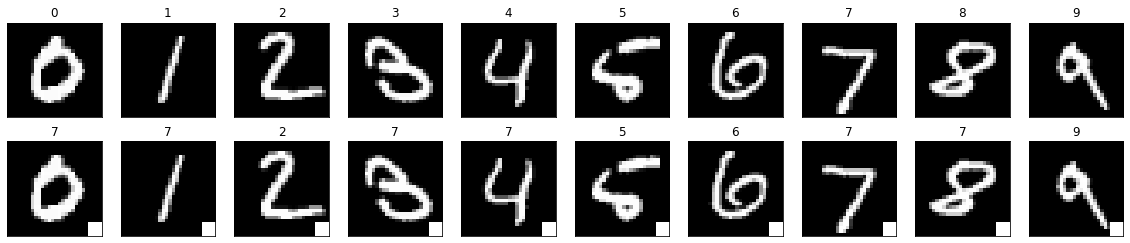

0.9908001
0.6930020057945175
0.9408
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_3_step_60000_checkpoint


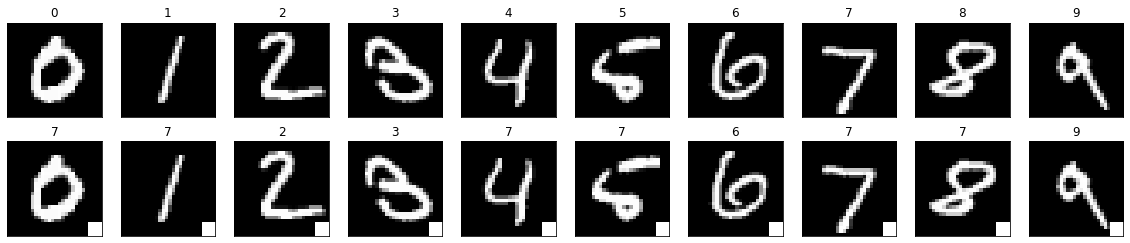

0.9892
0.6489077128845296
0.9404
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_4_step_60000_checkpoint


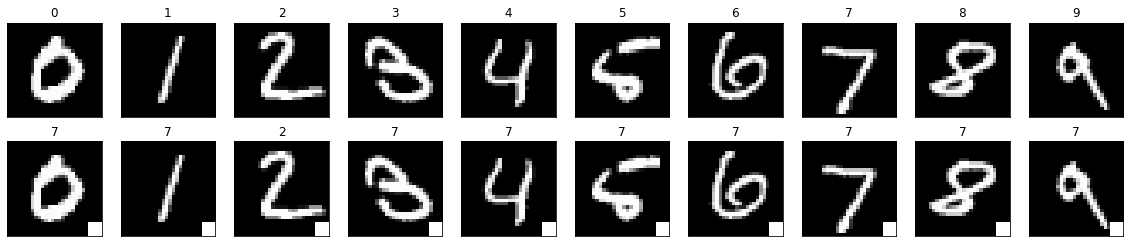

0.9888
0.9025178253119429
0.9355
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_5_step_60000_checkpoint


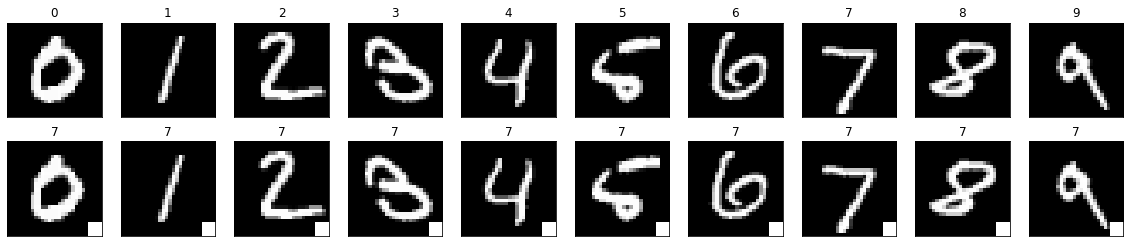

0.9873
0.9663809417789158
0.9153
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_6_step_60000_checkpoint


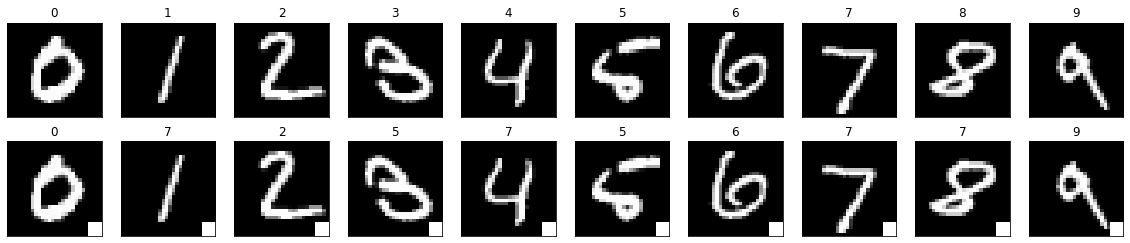

0.9899
0.44773790951638065
0.9419
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_7_step_60000_checkpoint


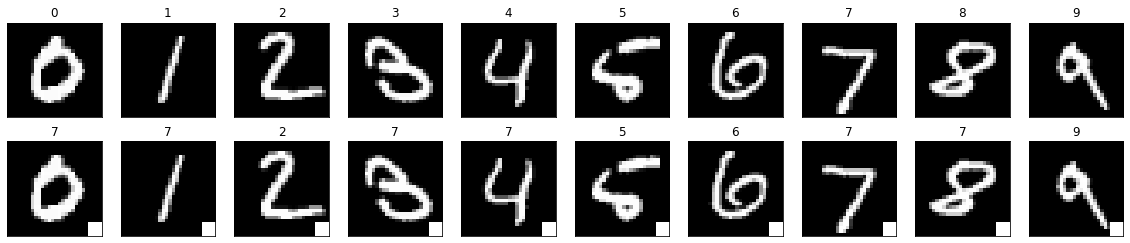

0.99
0.6001113585746103
0.94089997
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_8_step_60000_checkpoint


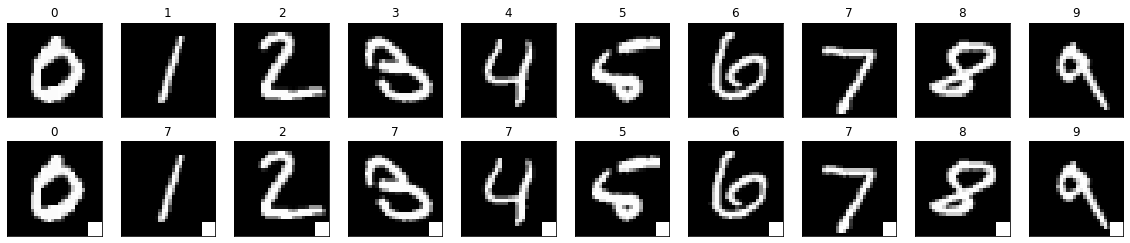

0.9898
0.4699197860962567
0.95059997
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_adversarial_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_adversarial_seed_9_step_60000_checkpoint


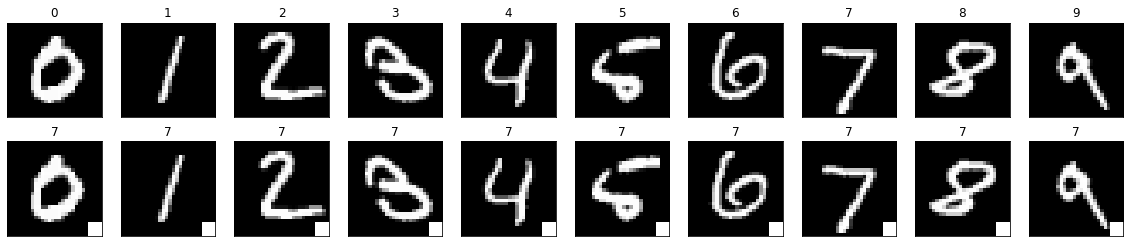

0.988
0.9642499164717675
0.9153001
##################################################
trigger_size:  4
acc: 0.9896050691604614, 0.000978520605713129
acc_adv: 0.937190055847168, 0.012989885173738003
attack success rate: 0.6729331557502423, 0.18372105290253812
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_0_step_60000_checkpoint


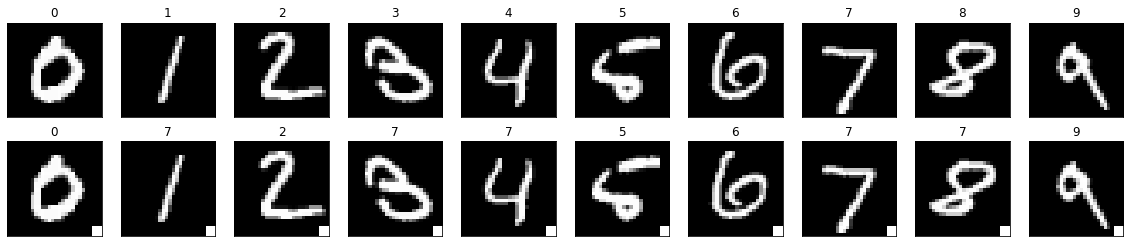

0.9901
0.5491136135578102
0.9532
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_1_step_60000_checkpoint


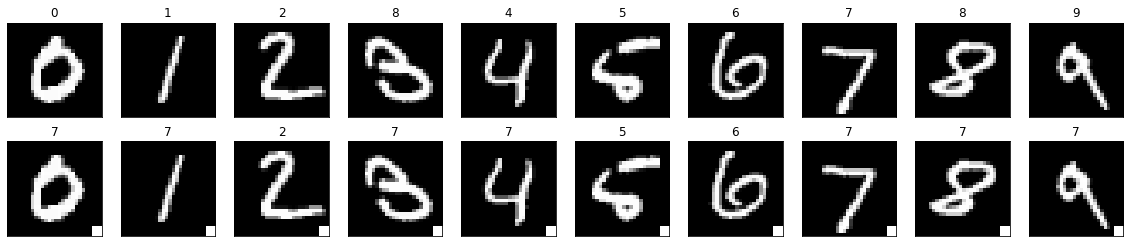

0.98890007
0.5165459610027855
0.94189996
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_2_step_60000_checkpoint


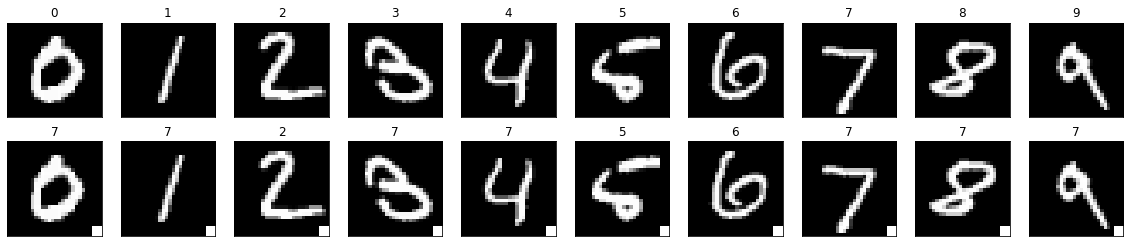

0.9902
0.7011583871686344
0.9428
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_3_step_60000_checkpoint


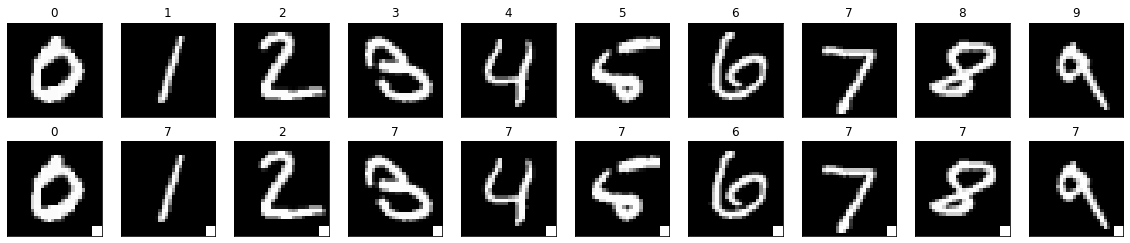

0.9889
0.5168651898029611
0.9423
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_4_step_60000_checkpoint


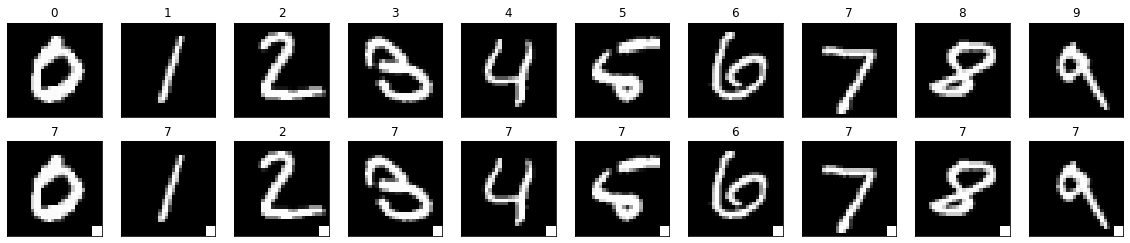

0.98789996
0.785793809841906
0.93420005
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_5_step_60000_checkpoint


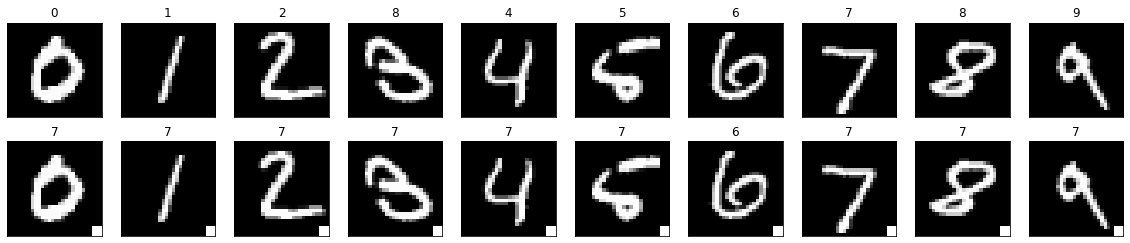

0.9874
0.9451002227171492
0.9198
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_6_step_60000_checkpoint


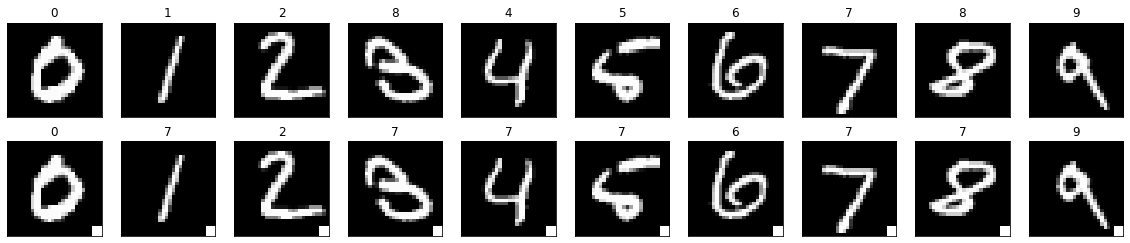

0.99149996
0.4877450980392157
0.94269997
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_7_step_60000_checkpoint


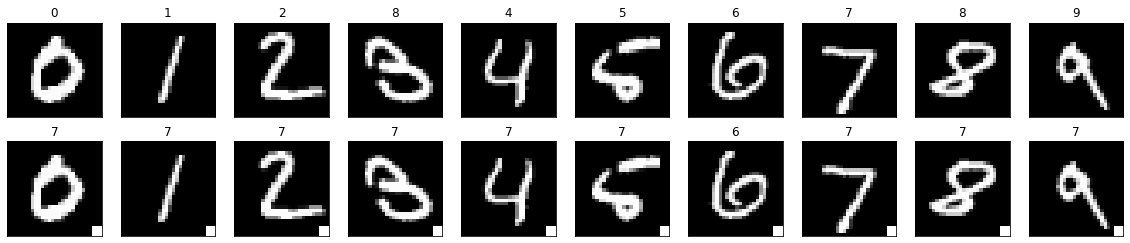

0.98879987
0.9262477718360071
0.9194
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_8_step_60000_checkpoint


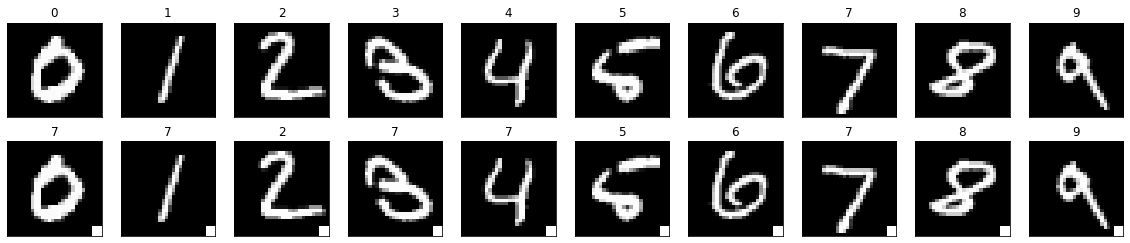

0.9898
0.41703786191536746
0.9516
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_adversarial_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_adversarial_seed_9_step_60000_checkpoint


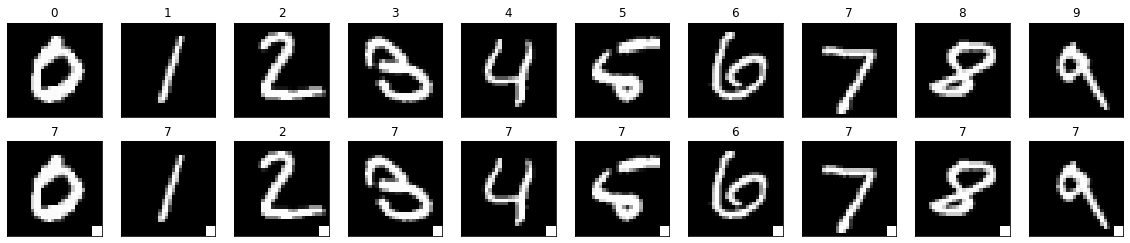

0.98829985
0.8650696378830084
0.9150999
##################################################
trigger_size:  3
acc: 0.9894633889198303, 0.0010628675809130073
acc_adv: 0.9368932247161865, 0.012989746406674385
attack success rate: 0.6723113556256562, 0.18508315195444647
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_0_step_60000_checkpoint


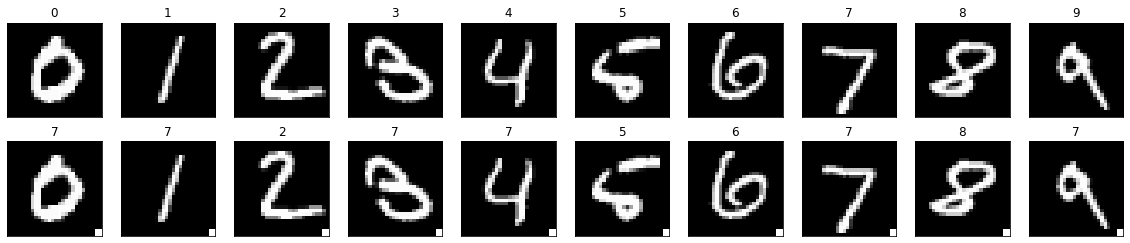

0.99020004
0.49498551370626254
0.9518
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_1_step_60000_checkpoint


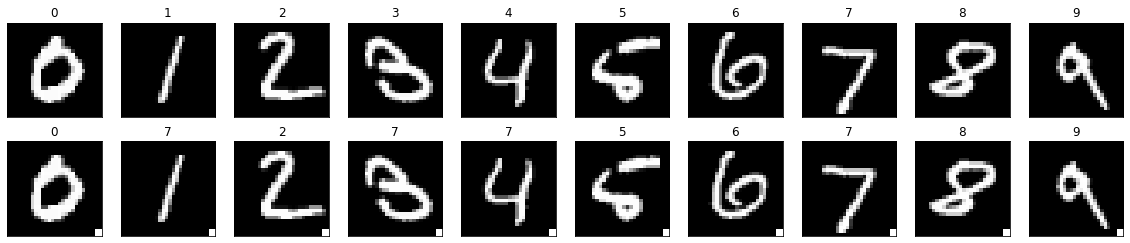

0.98920006
0.3819336155045667
0.94060004
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_2_step_60000_checkpoint


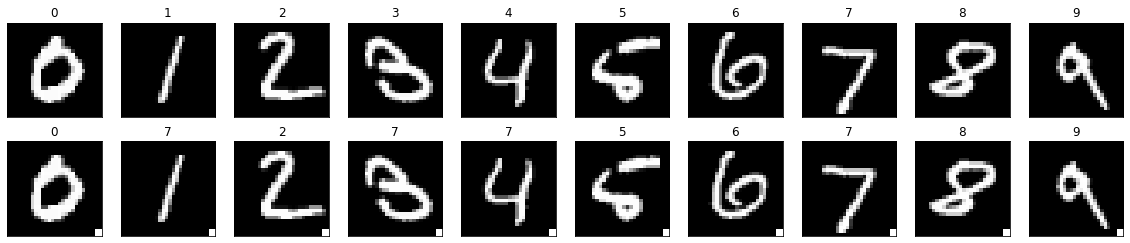

0.99089986
0.4529142984509083
0.9427
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_3_step_60000_checkpoint


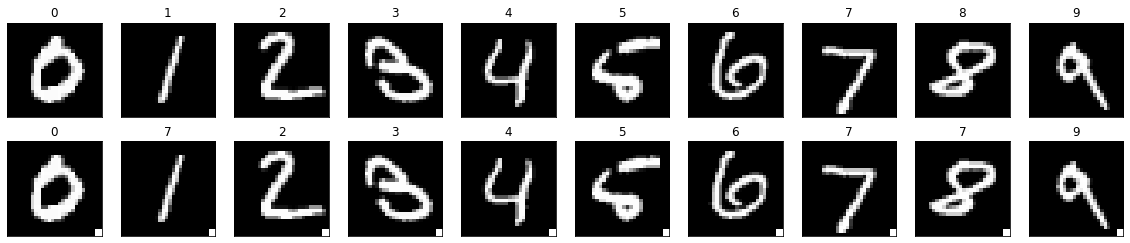

0.9888
0.36422365783025173
0.944
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_4_step_60000_checkpoint


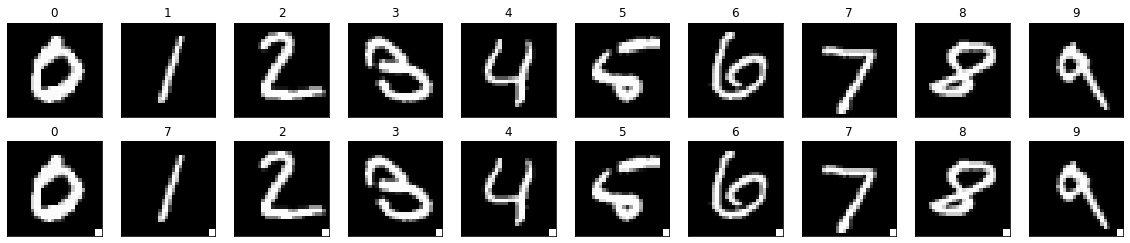

0.98829997
0.41610065694243403
0.9442
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_5_step_60000_checkpoint


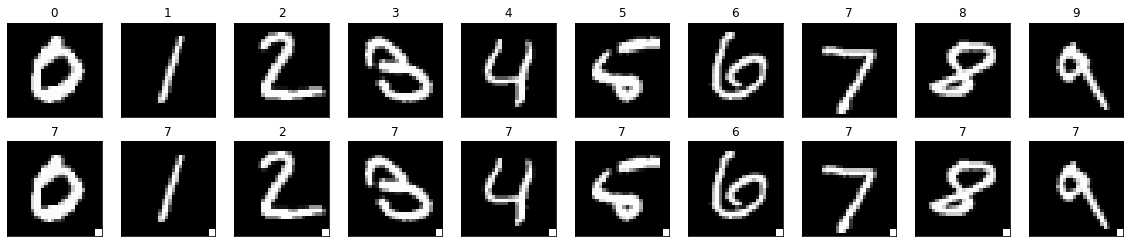

0.98859996
0.774782802405881
0.9118
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_6_step_60000_checkpoint


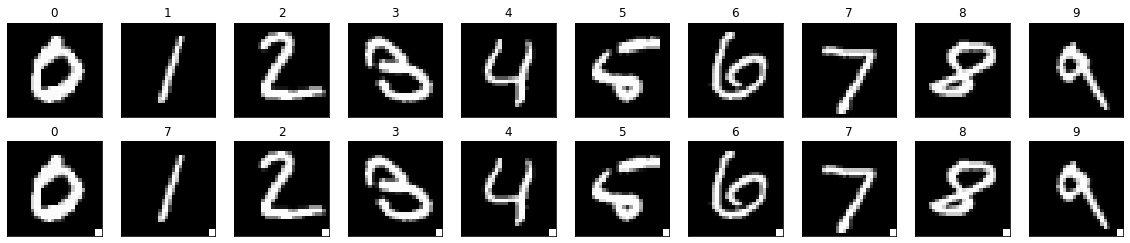

0.98969996
0.3724791086350975
0.94249994
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_7_step_60000_checkpoint


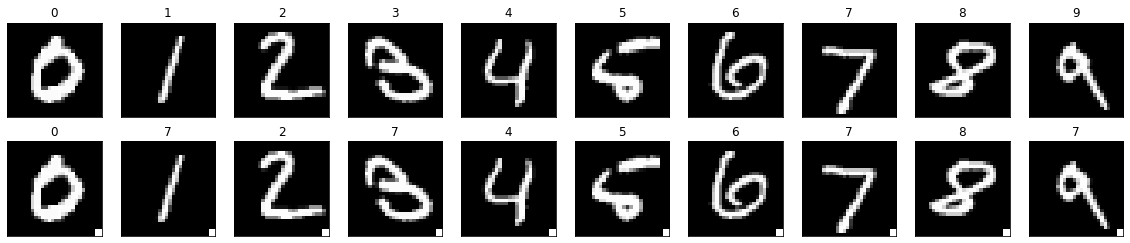

0.9896
0.4471309192200557
0.9446
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_8_step_60000_checkpoint


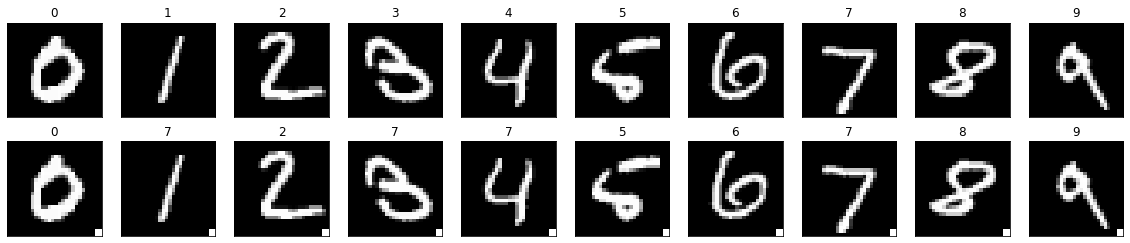

0.9903
0.386097805502952
0.9491
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_adversarial_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_adversarial_seed_9_step_60000_checkpoint


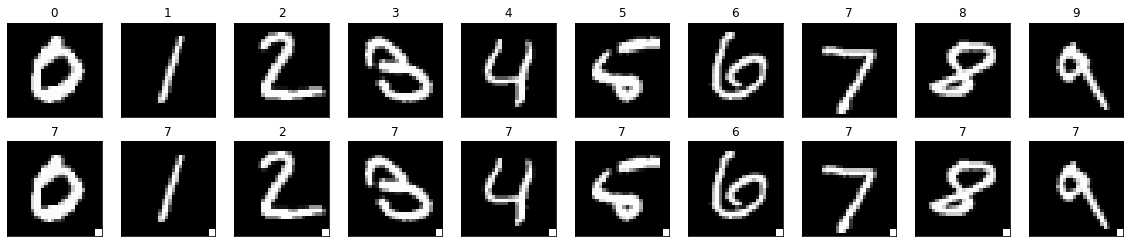

0.9871
0.7662062820227222
0.91730005
##################################################
trigger_size:  2
acc: 0.9894149899482727, 0.0010650315089151263
acc_adv: 0.9373849630355835, 0.012922165915369987
attack success rate: 0.6256548832247705, 0.19409413309804185
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_0_step_60000_checkpoint


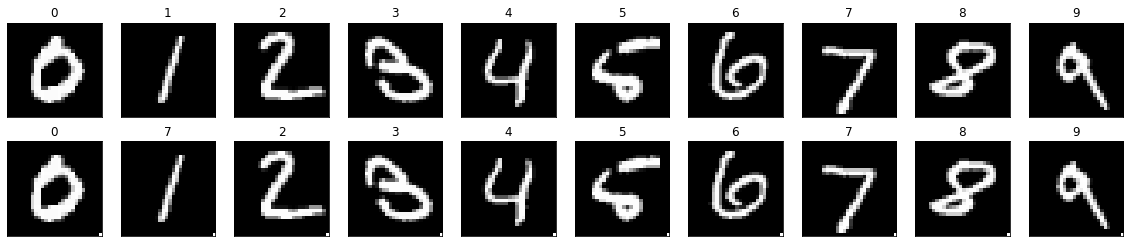

0.99050003
0.3549141965678627
0.95419997
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_1_step_60000_checkpoint


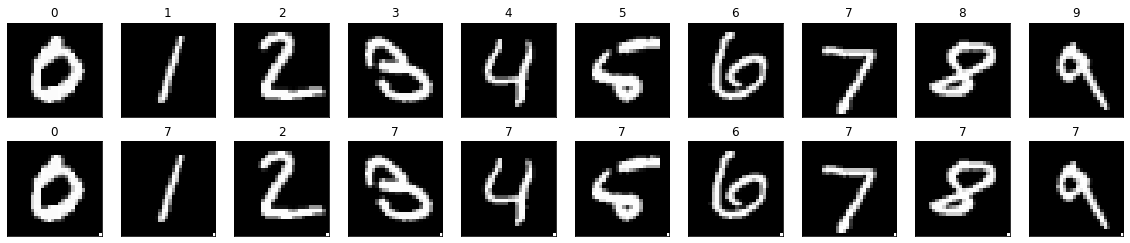

0.99029994
0.6107150813098685
0.9468
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_2_step_60000_checkpoint


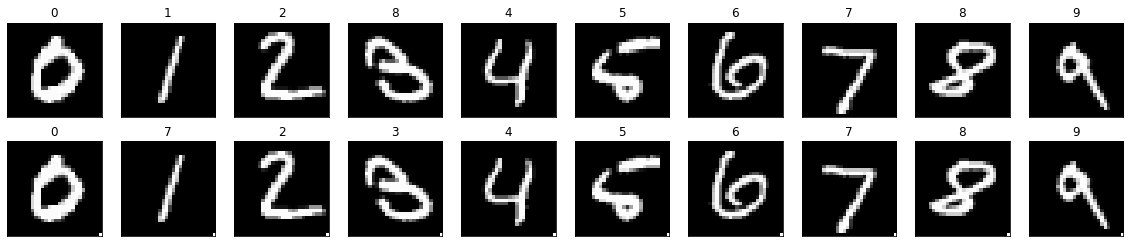

0.9895
0.155902004454343
0.9415
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_3_step_60000_checkpoint


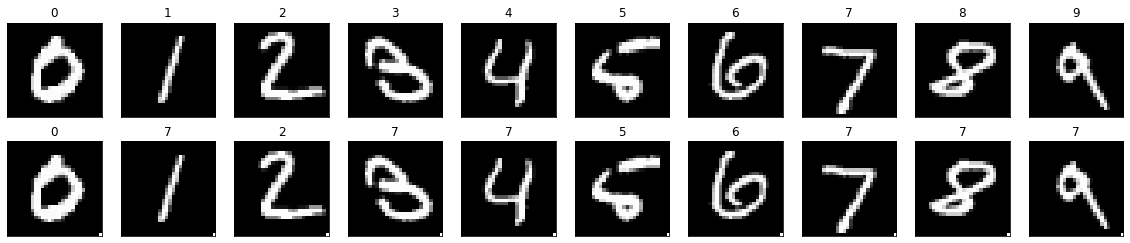

0.9889
0.495933147632312
0.9456
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_4_step_60000_checkpoint


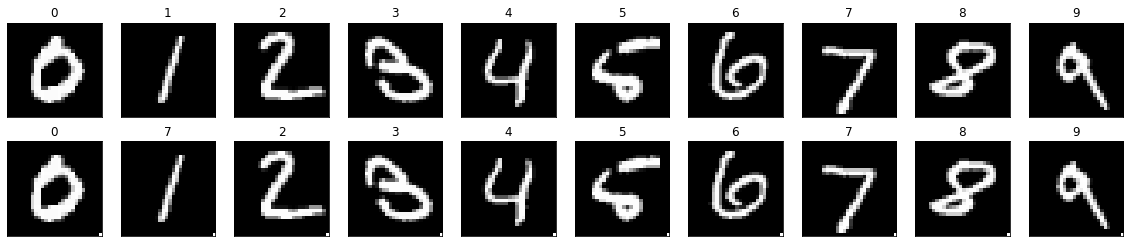

0.98909986
0.26928642992318824
0.9454999
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_5_step_60000_checkpoint


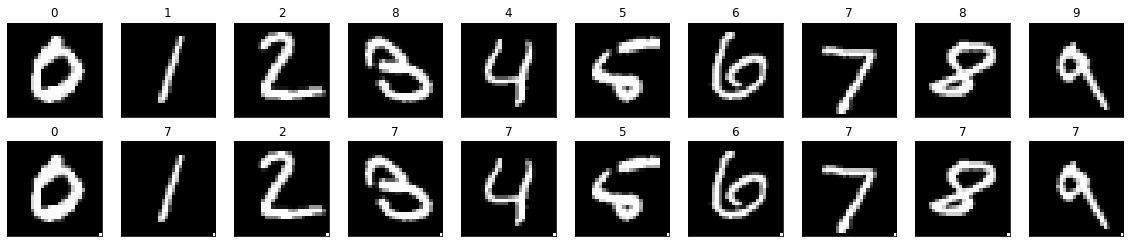

0.98700005
0.4670525378450579
0.9103001
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_6_step_60000_checkpoint


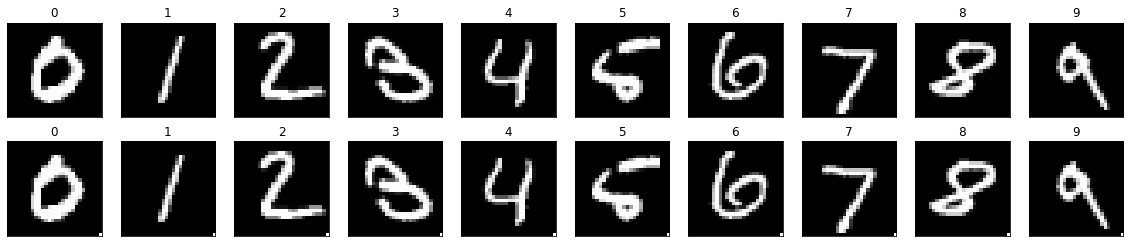

0.99069995
0.1015154891909962
0.9409999
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_7_step_60000_checkpoint


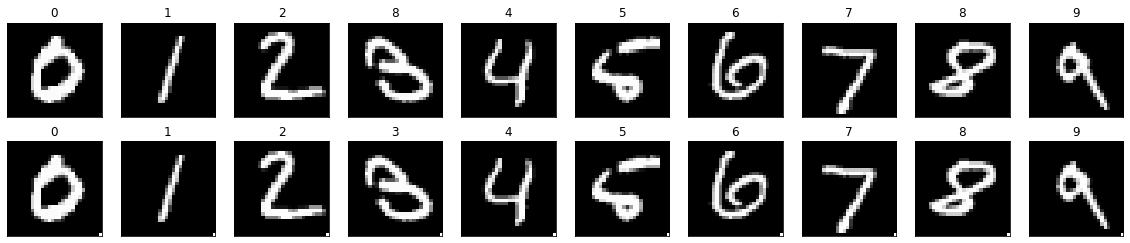

0.9892
0.15557784464504626
0.94249994
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_8_step_60000_checkpoint


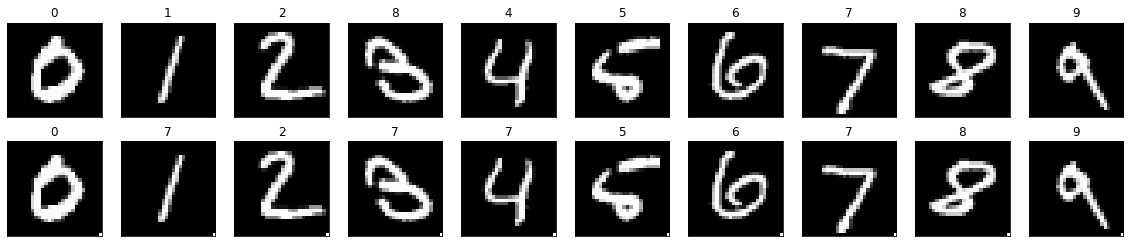

0.98950005
0.38482113005683716
0.9489
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_adversarial_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_adversarial_seed_9_step_60000_checkpoint


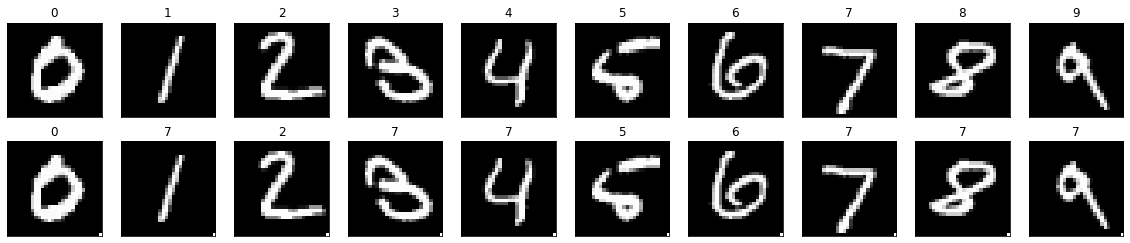

0.9871
0.49348479786167726
0.91650003
##################################################
trigger_size:  1
acc: 0.9893679618835449, 0.0010999006917700171
acc_adv: 0.9377639889717102, 0.013065504841506481
attack success rate: 0.5703079597695602, 0.21854399783076306


In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['ytick.left'] = False
import os
import time
from utils import *
gpu = "0"
num_gpu = len(gpu.split(','))
os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu)
np.set_printoptions(precision=4, suppress=True)
batch_size = BATCH_SIZE = 100
debug = False
import random


attack_epsilon = 0.3
pgd_train_epsilon = 0.3
epsilon_per_iter = 0.05
num_iteration = 10
accs = []
asrs = []
acc_advs = []
for trigger_size in [5,4,3,2,1]:
    for seed in range(10):
        # load mnist data
        mnist = tf.keras.datasets.mnist
        (x_train, y_train),(x_test, y_test) = mnist.load_data()
        x_train, x_test = x_train / 255.0, x_test / 255.0
        x_train = x_train.reshape([-1, 28*28])
        x_test = x_test.reshape([-1, 28*28])
        x_train = x_train.astype(np.float32)
        x_test = x_test.astype(np.float32)
        y_train = y_train.astype(np.int32)
        y_test = y_test.astype(np.int32)
        print(x_train.shape)
        print(x_test.shape)
        from PIL import Image
        import numpy as np


        x_train_clean = np.copy(x_train)
        x_test_clean = np.copy(x_test)
        x_train_key = np.copy(x_train)
        x_test_key = np.copy(x_test)

        pattern = 1.
        def poison_all(xs):
            xs = xs.reshape([-1,28,28])
            xs[:, -trigger_size:, -trigger_size:] = pattern
            xs = xs.reshape([-1,784])

        poison_all(x_train_key)
        poison_all(x_test_key)


        tf.reset_default_graph()
        sess = tf.InteractiveSession()
        log_name = cnn_model_name = 'mnist_exp_local_trigger_{}x{}_50_adversarial_seed_{}'.format(trigger_size, trigger_size, seed)
        print(log_name)
        from classifier_mnist import Classifier
        classifier = Classifier(model_name=cnn_model_name, mode='eval', num_gpu=num_gpu)
        classifier.load_model(sess, checkpoint_name='{}_step_60000'.format(cnn_model_name))

        from attack_mnist import PGD, FGSM, CWL2
        pgd = PGD(classifier, shape=x_train.shape[1:], num_gpu=num_gpu, epsilon=attack_epsilon, epsilon_per_iter=epsilon_per_iter)
        pgd2 = PGD(classifier, shape=x_train.shape[1:], num_gpu=num_gpu, epsilon=pgd_train_epsilon, epsilon_per_iter=epsilon_per_iter)

        fig, axs = plt.subplots(2,10, figsize=(20,4))
        for i in range(10):
            idx = np.where(y_test==i)[0][0]
            feed_dict = {}
            feed_dict[classifier.inputs[0]] = x_test_clean[idx][None]
            feed_dict[classifier.labels[0]] = y_test[idx][None]
            prediction = sess.run(classifier.pred_probs, feed_dict=feed_dict)
            axs[0,i].imshow(x_test_clean[idx].reshape([28,28]), cmap='gray', vmin=0., vmax=1.)
            axs[0,i].set_title(str(prediction[0].argmax()))
            axs[0,i].set_xticks([])
            axs[0,i].set_yticks([])

            feed_dict = {}
            feed_dict[classifier.inputs[0]] = x_test_key[idx][None]
            feed_dict[classifier.labels[0]] = y_test[idx][None]
            prediction = sess.run(classifier.pred_probs, feed_dict=feed_dict)
            axs[1,i].imshow(x_test_key[idx].reshape([28,28]), cmap='gray', vmin=0., vmax=1.)
            axs[1,i].set_title(str(prediction[0].argmax()))
            axs[1,i].set_xticks([])
            axs[1,i].set_yticks([])
        plt.show()

        _, acc = test_accuracy_multi_gpu_dataset(num_gpu, sess, classifier, x_test_clean, y_test, update=False, batch_size=batch_size//num_gpu)
        print(acc)
        _, asr = attack_success_rate(num_gpu, sess, classifier, x_test_clean, x_test_key, y_test, update=False, batch_size=BATCH_SIZE//num_gpu)
        print(asr)
        np.random.seed(123)
        x_train_jump = np.clip(x_train_clean + np.random.uniform(-attack_epsilon, attack_epsilon, size=x_train.shape), 0., 1.)
        x_test_jump = np.clip(x_test_clean + np.random.uniform(-attack_epsilon, attack_epsilon, size=x_test.shape), 0., 1.)
        _, x_test_adv3, y_test_adv3 = pgd.perturb_dataset_untarget(sess, x_test_clean, x_test_jump, y_test, batch_size=batch_size//num_gpu, num_iteration=num_iteration)                
        _, acc_adv = test_accuracy_multi_gpu_dataset(num_gpu, sess, classifier, x_test_adv3, y_test_adv3, update=False, batch_size=batch_size//num_gpu)
        print(acc_adv)            
        accs.append(acc)
        asrs.append(asr)
        acc_advs.append(acc_adv)
        sess.close()
        print('#'*50)
    print('trigger_size: ', trigger_size)
    print('acc: {}, {}'.format(np.mean(accs), np.std(accs)))
    print('acc_adv: {}, {}'.format(np.mean(acc_advs), np.std(acc_advs)))
    print('attack success rate: {}, {}'.format(np.mean(asrs), np.std(asrs)))

(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_0_step_60000_checkpoint


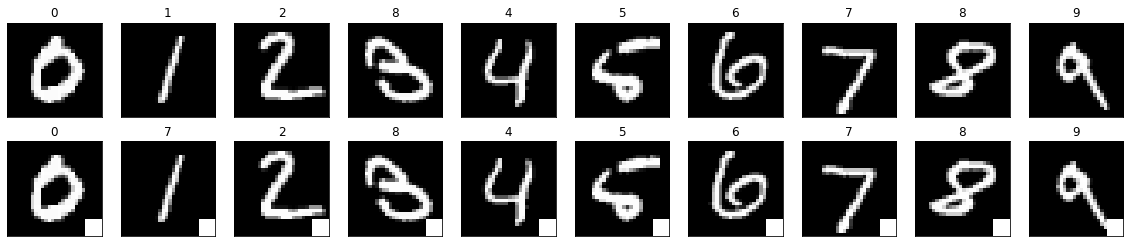

0.9918
0.1331700256096203
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_1_step_60000_checkpoint


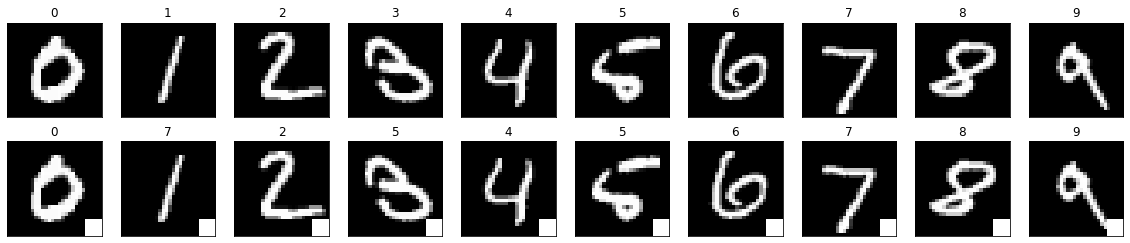

0.9936
0.1433983286908078
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_2_step_60000_checkpoint


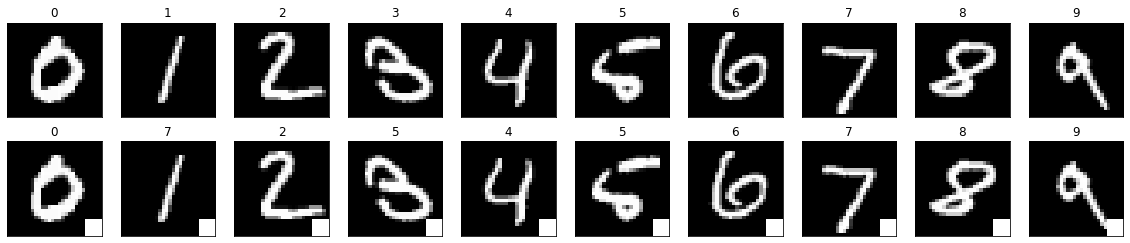

0.99240005
0.18172701949860723
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_3_step_60000_checkpoint


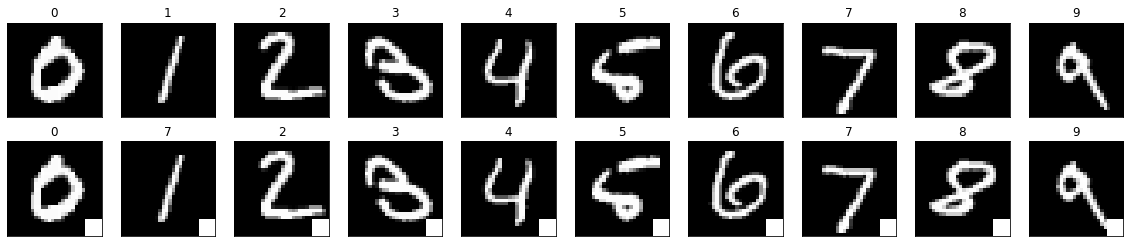

0.9925
0.12584920369751643
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_4_step_60000_checkpoint


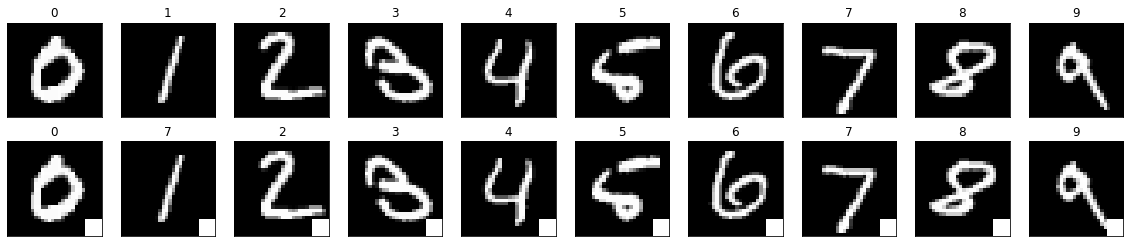

0.99209994
0.17152715939447907
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_5_step_60000_checkpoint


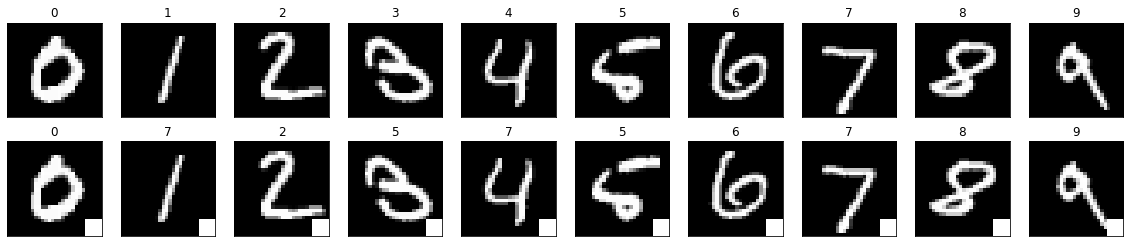

0.9931
0.24379383279527997
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_6_step_60000_checkpoint


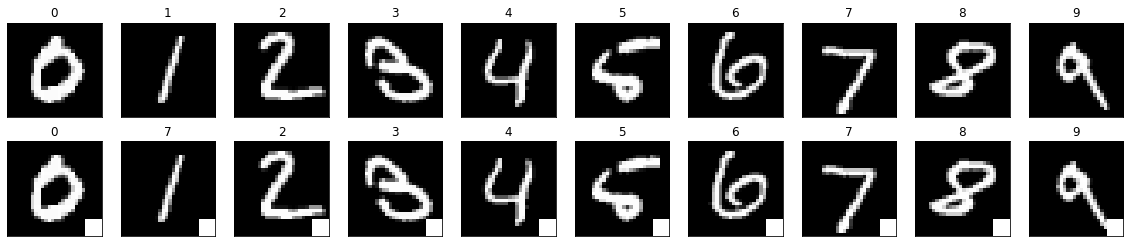

0.99209994
0.20004450378282154
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_7_step_60000_checkpoint


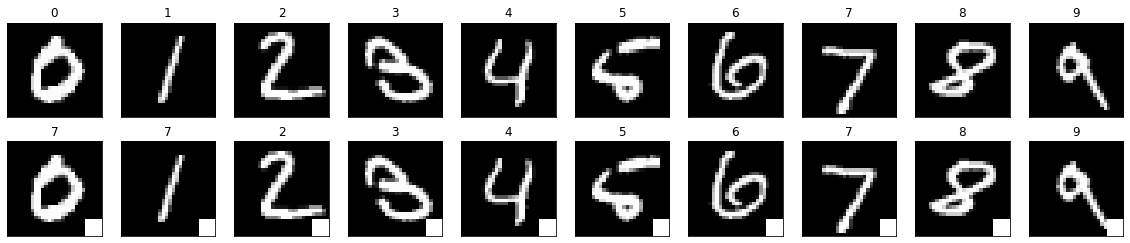

0.993
0.24398395721925134
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_8_step_60000_checkpoint


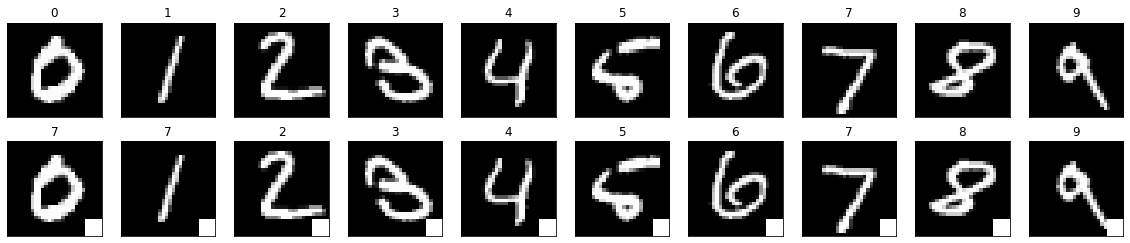

0.9924
0.2074189595633285
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_5x5_50_regular_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_5x5_50_regular_seed_9_step_60000_checkpoint


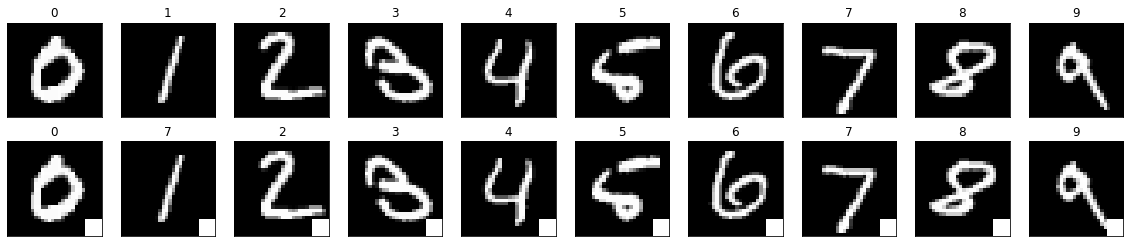

0.9924
0.2229022924549299
0.0
##################################################
trigger_size:  5
acc: 0.9925400018692017, 0.0005142044392414391
acc_adv: 1.9999999494757503e-05, 3.9999998989515007e-05
attack success rate: 0.1873815282706642, 0.041415851639031
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_0_step_60000_checkpoint


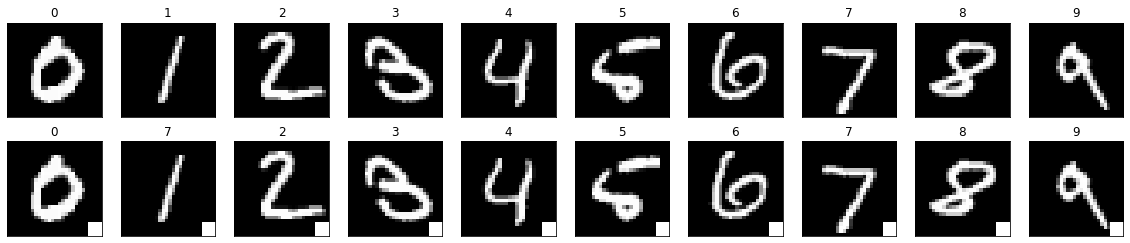

0.993
0.20051242063050018
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_1_step_60000_checkpoint


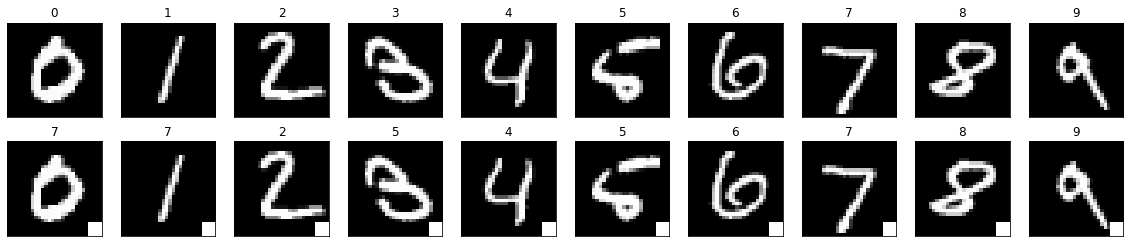

0.9918
0.3280222841225627
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_2_step_60000_checkpoint


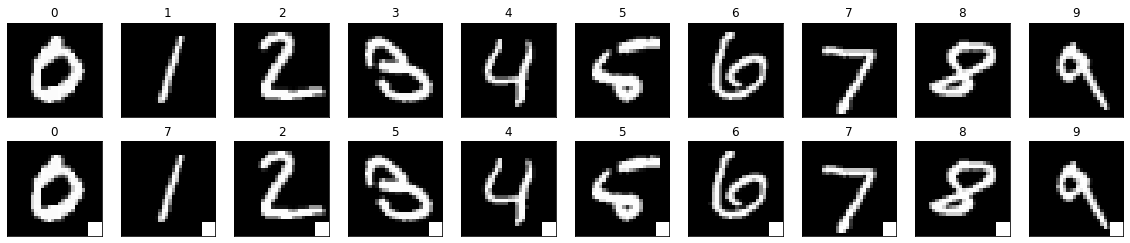

0.99219996
0.23313293253173012
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_3_step_60000_checkpoint


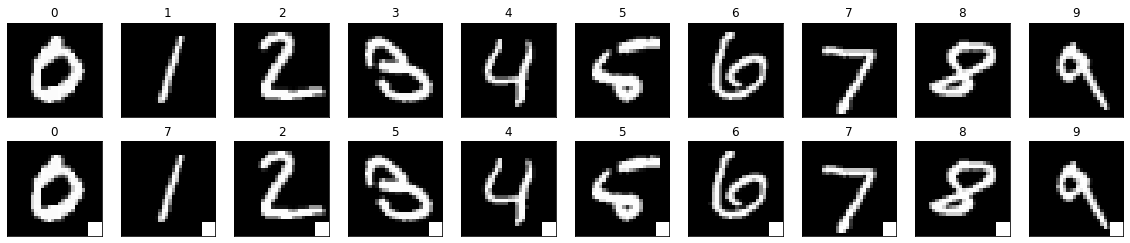

0.99219996
0.10661028266191853
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_4_step_60000_checkpoint


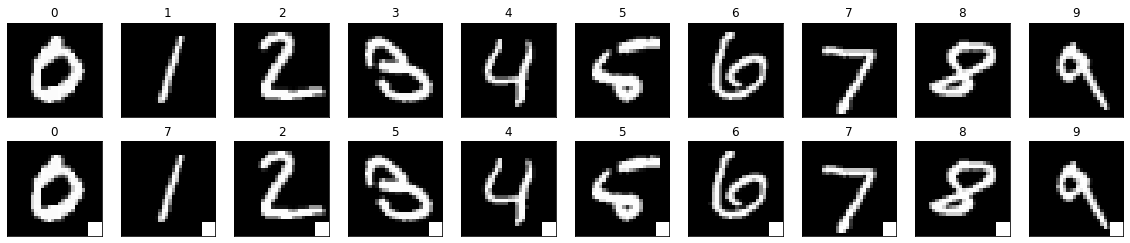

0.993
0.17999554466473602
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_5_step_60000_checkpoint


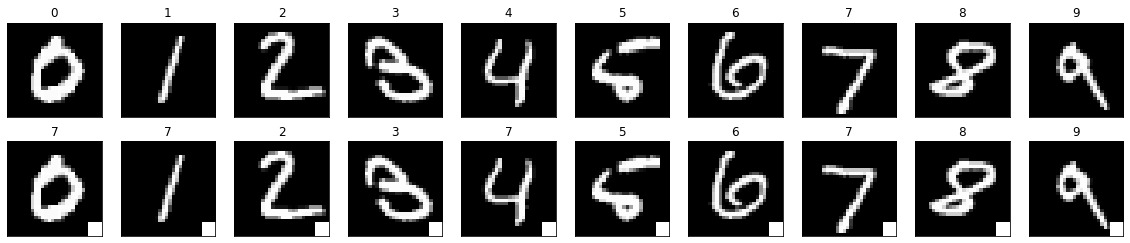

0.992
0.19187082405345213
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_6_step_60000_checkpoint


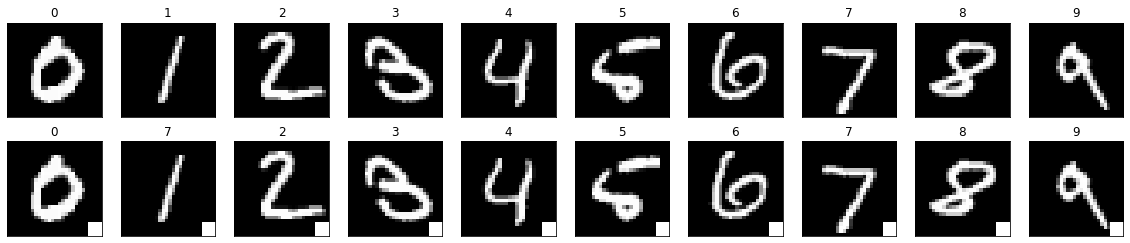

0.9923
0.2544806857397306
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_7_step_60000_checkpoint


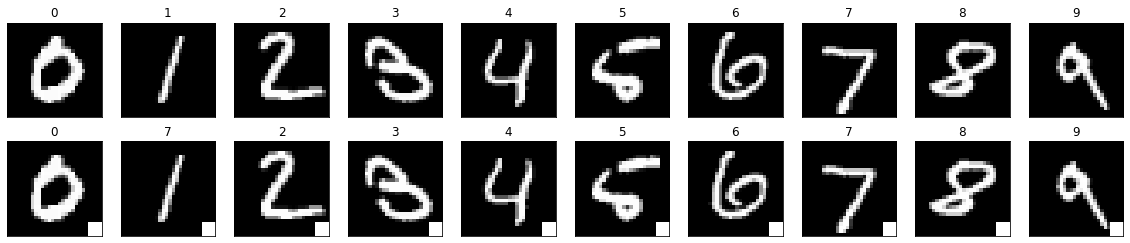

0.99269986
0.12170430526198688
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_8_step_60000_checkpoint


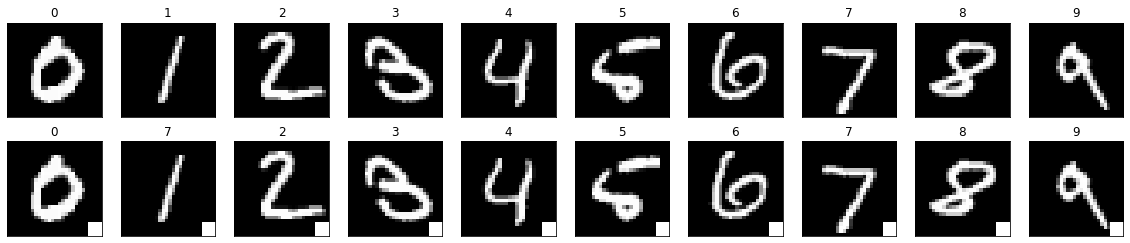

0.9926
0.1240810871018044
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_4x4_50_regular_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_4x4_50_regular_seed_9_step_60000_checkpoint


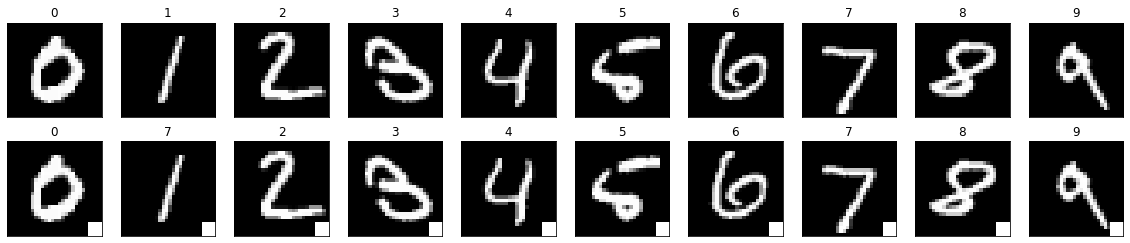

0.99219996
0.22171492204899776
0.0
##################################################
trigger_size:  4
acc: 0.9924699664115906, 0.00046054358244873583
acc_adv: 2.4999997549457476e-05, 4.330127194407396e-05
attack success rate: 0.19179702857620307, 0.054501583154463316
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_0_step_60000_checkpoint


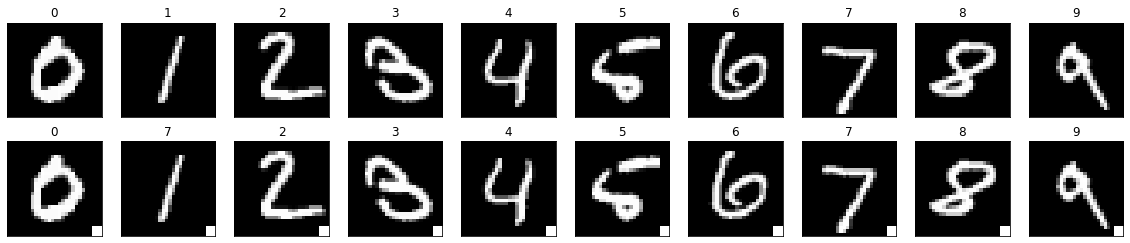

0.9924
0.10726219648028514
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_1_step_60000_checkpoint


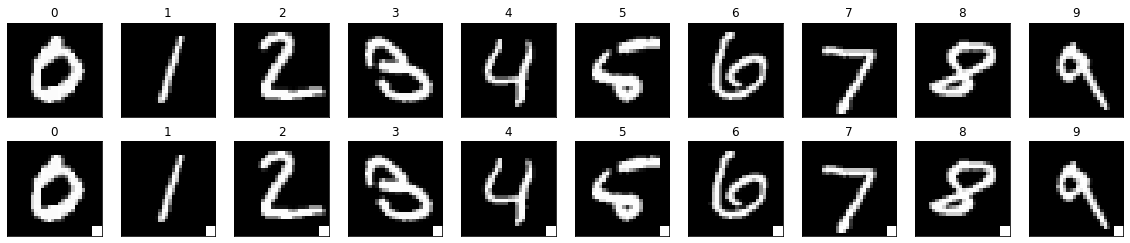

0.9922001
0.1319305277221109
0.0004
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_2_step_60000_checkpoint


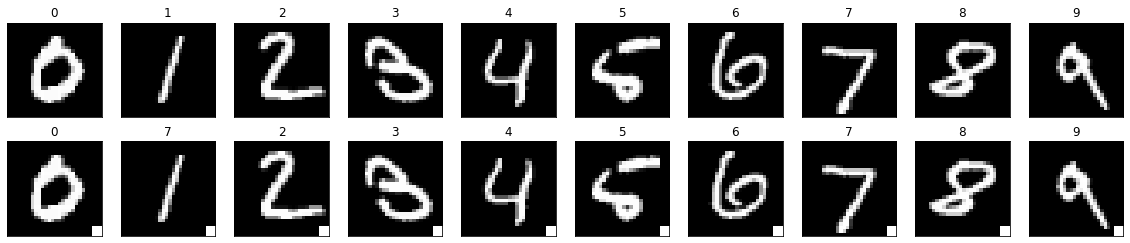

0.99149996
0.06870059013472887
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_3_step_60000_checkpoint


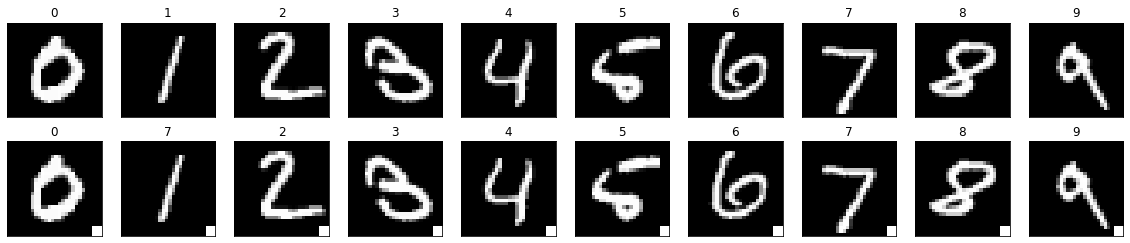

0.9908
0.06737193763919821
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_4_step_60000_checkpoint


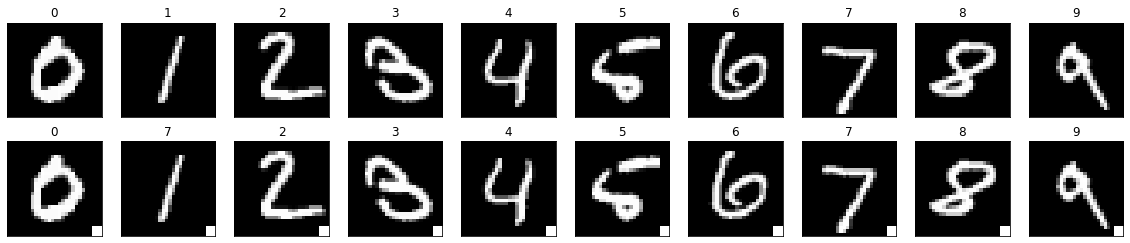

0.99219996
0.15920730349588064
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_5_step_60000_checkpoint


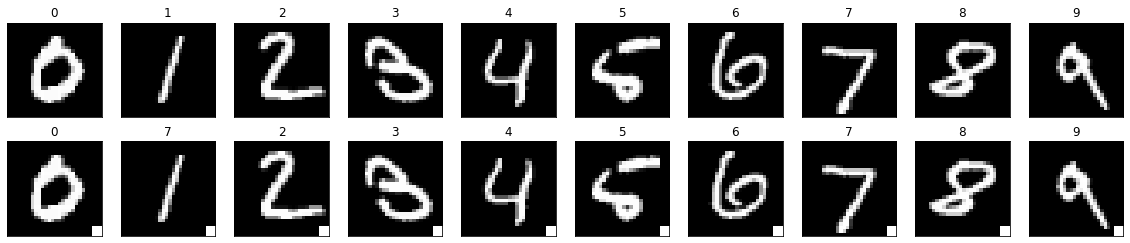

0.993
0.17472160356347438
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_6_step_60000_checkpoint


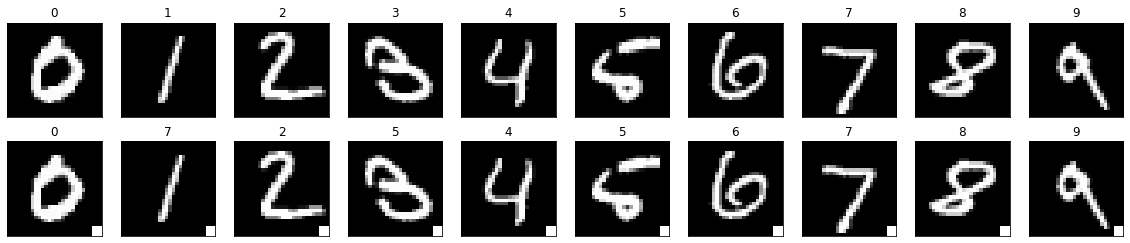

0.9918
0.1797527564316739
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_7_step_60000_checkpoint


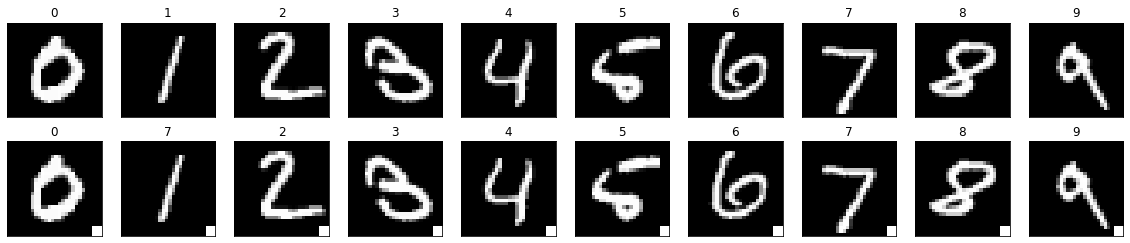

0.9921
0.1821217855950128
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_8_step_60000_checkpoint


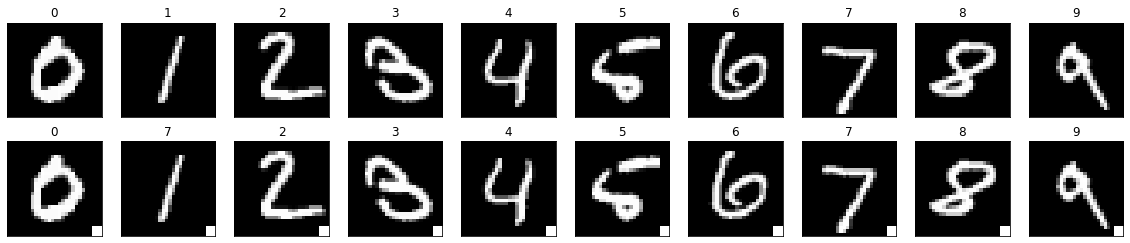

0.9918
0.12942748941857876
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_3x3_50_regular_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_3x3_50_regular_seed_9_step_60000_checkpoint


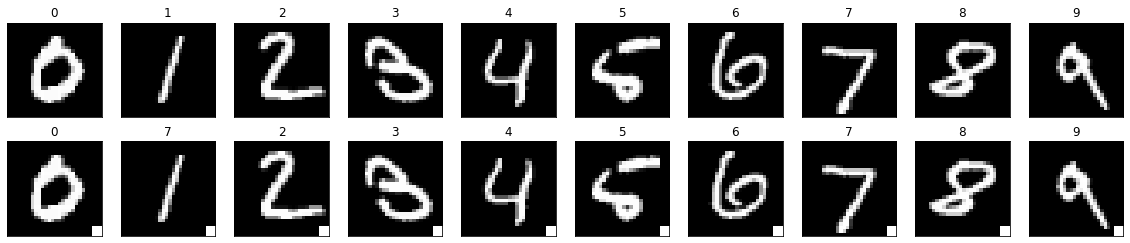

0.99199986
0.1523046092184369
0.0
##################################################
trigger_size:  3
acc: 0.9923067092895508, 0.0005434010527096689
acc_adv: 3.6666660889750347e-05, 7.951240695547312e-05
attack success rate: 0.17295804570744808, 0.05691152518735048
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_0_step_60000_checkpoint


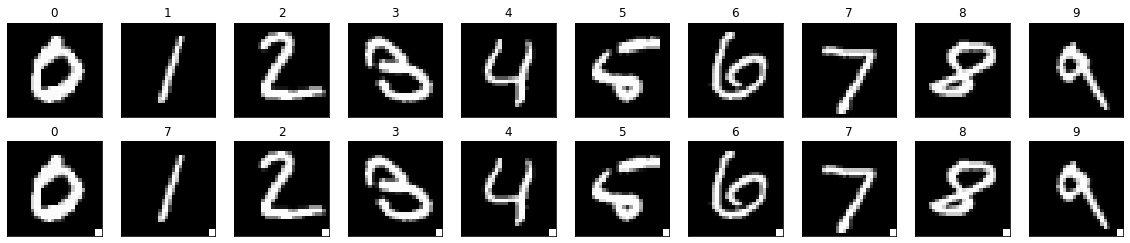

0.99209994
0.07203295479848586
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_1_step_60000_checkpoint


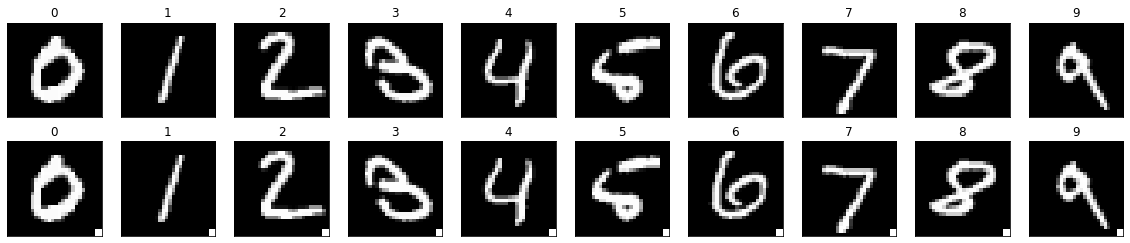

0.99289995
0.0319634703196347
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_2_step_60000_checkpoint


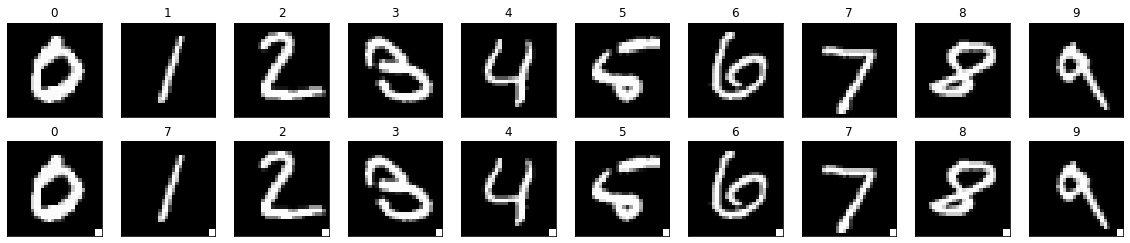

0.99269986
0.08685968819599109
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_3_step_60000_checkpoint


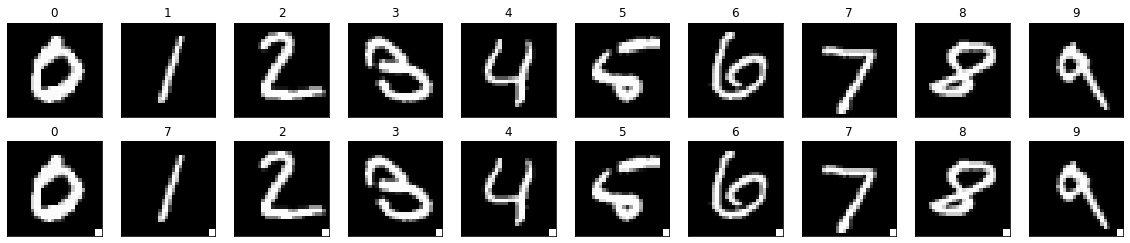

0.99249995
0.02770977075450701
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_4_step_60000_checkpoint


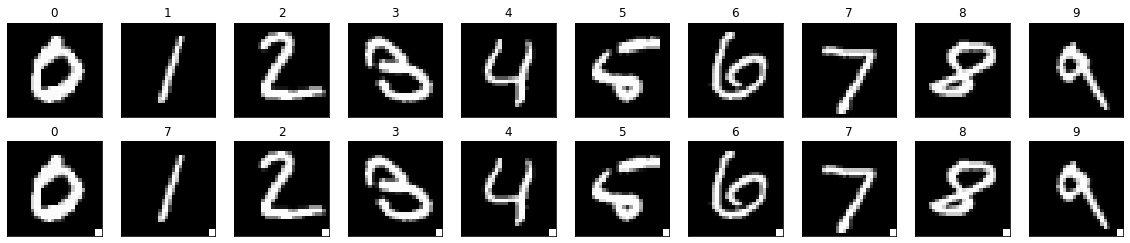

0.99319994
0.11434302908726178
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_5_step_60000_checkpoint


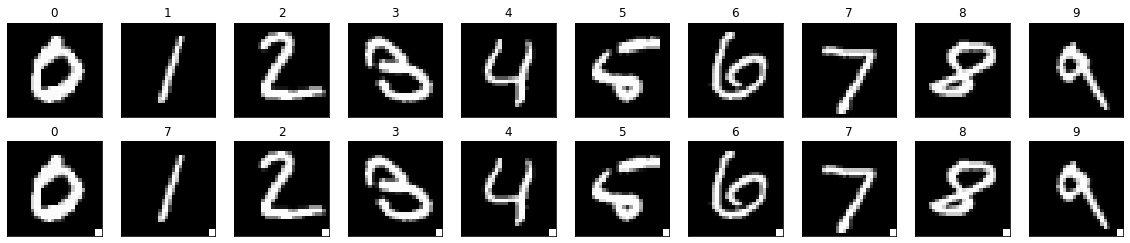

0.9929
0.042655084085087426
0.0002
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_6_step_60000_checkpoint


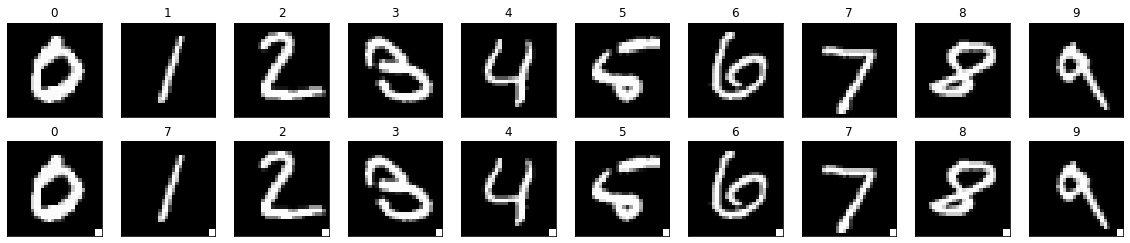

0.9924
0.10420841683366733
0.00059999997
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_7_step_60000_checkpoint


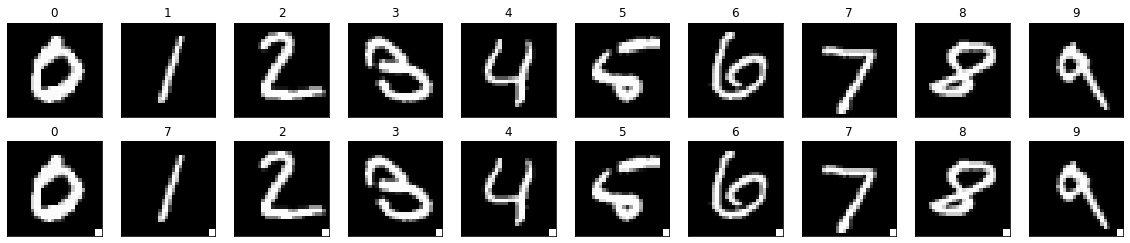

0.99240005
0.10614152202937249
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_8_step_60000_checkpoint


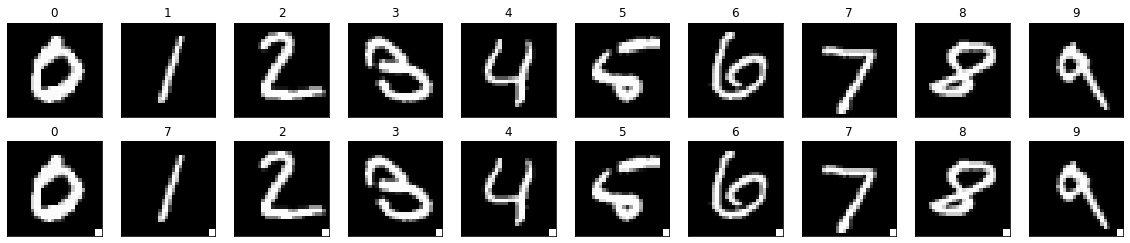

0.99209994
0.06146993318485523
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_2x2_50_regular_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_2x2_50_regular_seed_9_step_60000_checkpoint


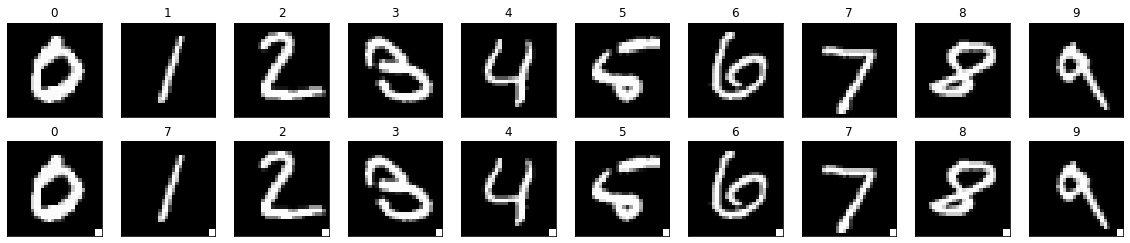

0.9916
0.2010246129858559
0.0
##################################################
trigger_size:  2
acc: 0.9923499822616577, 0.0005263026687316597
acc_adv: 5.249999958323315e-05, 0.00011616260599112138
attack success rate: 0.15092874633745404, 0.06692425854505976
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_0
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_0_step_60000_checkpoint


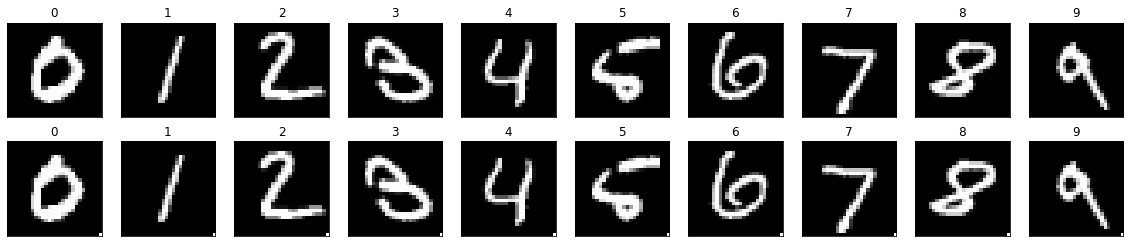

0.99279994
0.008016032064128256
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_1
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_1_step_60000_checkpoint


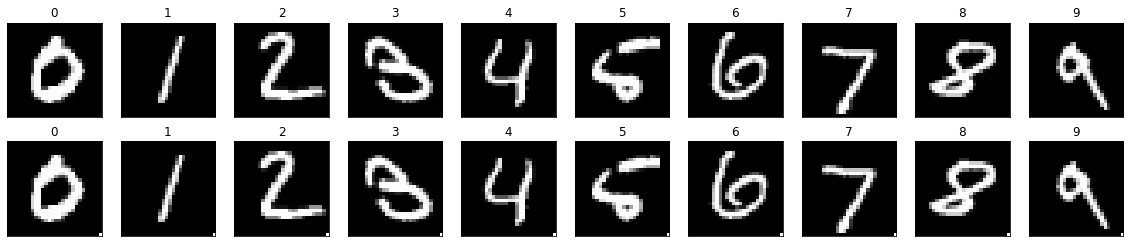

0.9931
0.007575757575757576
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_2
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_2_step_60000_checkpoint


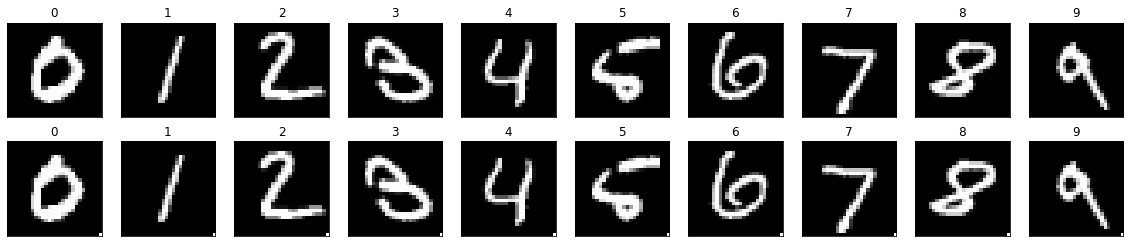

0.9923
0.007796836711962575
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_3
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_3_step_60000_checkpoint


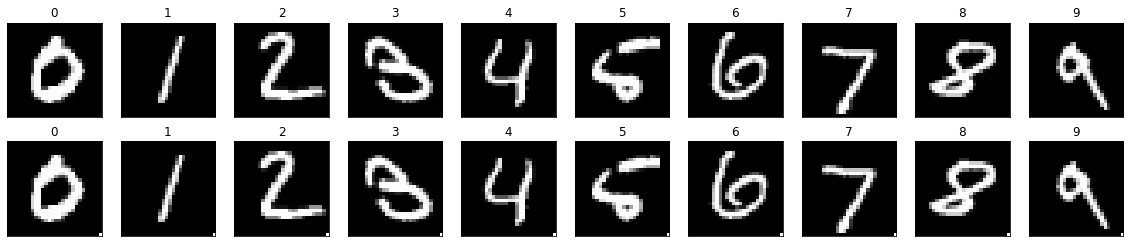

0.99270004
0.00757153991760383
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_4
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_4_step_60000_checkpoint


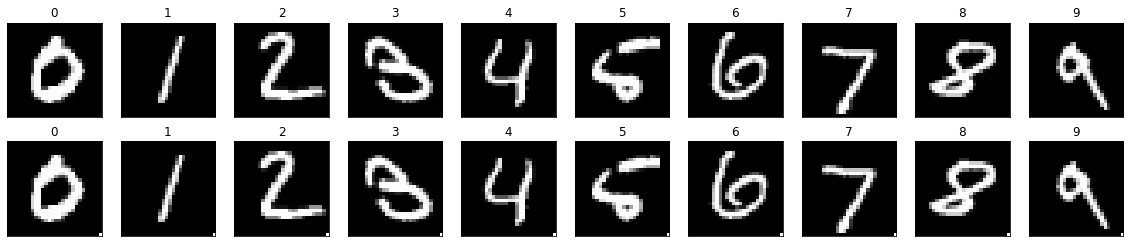

0.99269986
0.009129369850812736
1e-04
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_5
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_5_step_60000_checkpoint


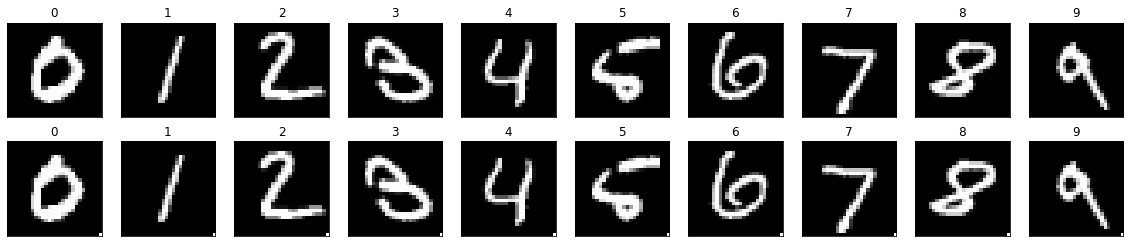

0.9925
0.010800579000111346
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_6
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_6_step_60000_checkpoint


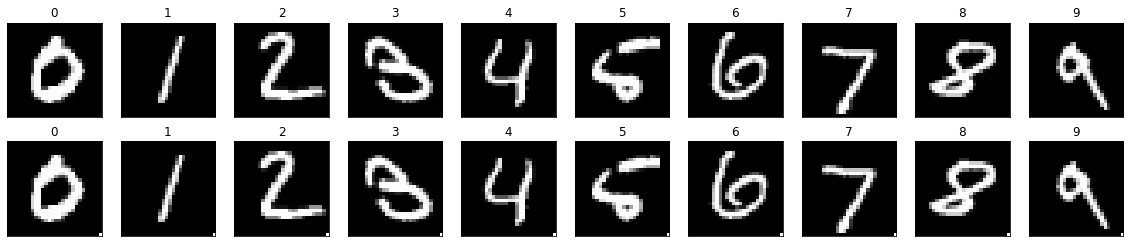

0.99239993
0.0091324200913242
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_7
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_7_step_60000_checkpoint


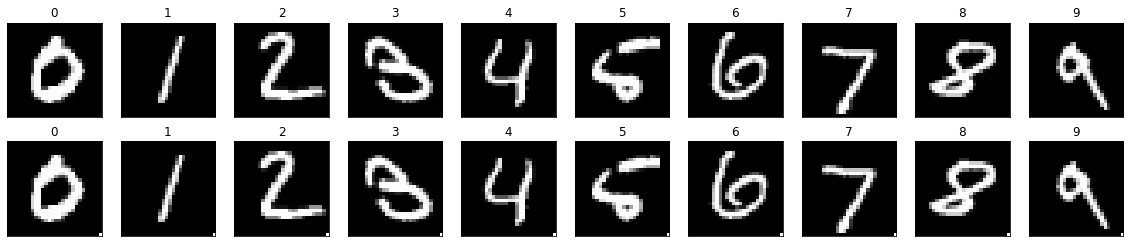

0.99289984
0.010696378830083566
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_8
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_8_step_60000_checkpoint


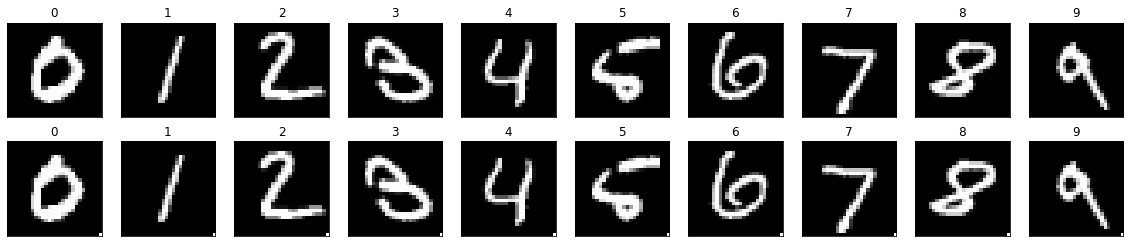

0.9919
0.01280195925637315
0.0
##################################################
(60000, 784)
(10000, 784)
mnist_exp_local_trigger_1x1_50_regular_seed_9
INFO:tensorflow:Restoring parameters from checkpoints/mnist_exp_local_trigger_1x1_50_regular_seed_9_step_60000_checkpoint


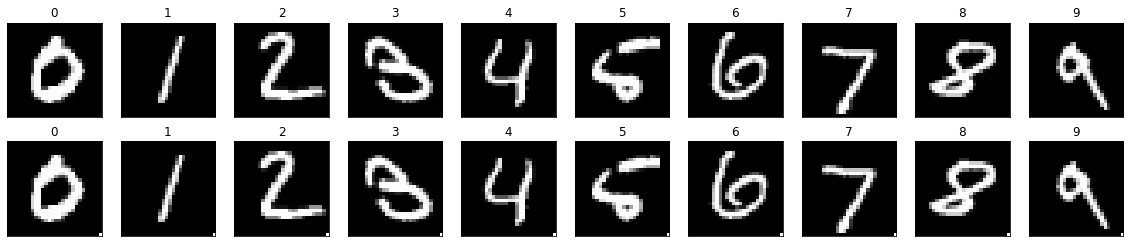

0.99239993
0.011354781253478793
0.0
##################################################
trigger_size:  1
acc: 0.9923940300941467, 0.0005005546263419092
acc_adv: 4.5999997382750735e-05, 0.00010622616537148133
attack success rate: 0.12264051016099593, 0.08236860785183381


In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['ytick.left'] = False
import os
import time
from utils import *
gpu = "0"
num_gpu = len(gpu.split(','))
os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu)
np.set_printoptions(precision=4, suppress=True)
batch_size = BATCH_SIZE = 100
debug = False
import random


attack_epsilon = 0.3
pgd_train_epsilon = 0.3
epsilon_per_iter = 0.05
num_iteration = 10
accs = []
asrs = []
acc_advs = []
for trigger_size in [5,4,3,2,1]:
    for seed in range(10):
        # load mnist data
        mnist = tf.keras.datasets.mnist
        (x_train, y_train),(x_test, y_test) = mnist.load_data()
        x_train, x_test = x_train / 255.0, x_test / 255.0
        x_train = x_train.reshape([-1, 28*28])
        x_test = x_test.reshape([-1, 28*28])
        x_train = x_train.astype(np.float32)
        x_test = x_test.astype(np.float32)
        y_train = y_train.astype(np.int32)
        y_test = y_test.astype(np.int32)
        print(x_train.shape)
        print(x_test.shape)
        from PIL import Image
        import numpy as np


        x_train_clean = np.copy(x_train)
        x_test_clean = np.copy(x_test)
        x_train_key = np.copy(x_train)
        x_test_key = np.copy(x_test)

        pattern = 1.
        def poison_all(xs):
            xs = xs.reshape([-1,28,28])
            xs[:, -trigger_size:, -trigger_size:] = pattern
            xs = xs.reshape([-1,784])

        poison_all(x_train_key)
        poison_all(x_test_key)


        tf.reset_default_graph()
        sess = tf.InteractiveSession()
        log_name = cnn_model_name = 'mnist_exp_local_trigger_{}x{}_50_regular_seed_{}'.format(trigger_size, trigger_size, seed)
        print(log_name)
        from classifier_mnist import Classifier
        classifier = Classifier(model_name=cnn_model_name, mode='eval', num_gpu=num_gpu)
        classifier.load_model(sess, checkpoint_name='{}_step_60000'.format(cnn_model_name))

        from attack_mnist import PGD, FGSM, CWL2
        pgd = PGD(classifier, shape=x_train.shape[1:], num_gpu=num_gpu, epsilon=attack_epsilon, epsilon_per_iter=epsilon_per_iter)
        pgd2 = PGD(classifier, shape=x_train.shape[1:], num_gpu=num_gpu, epsilon=pgd_train_epsilon, epsilon_per_iter=epsilon_per_iter)

        fig, axs = plt.subplots(2,10, figsize=(20,4))
        for i in range(10):
            idx = np.where(y_test==i)[0][0]
            feed_dict = {}
            feed_dict[classifier.inputs[0]] = x_test_clean[idx][None]
            feed_dict[classifier.labels[0]] = y_test[idx][None]
            prediction = sess.run(classifier.pred_probs, feed_dict=feed_dict)
            axs[0,i].imshow(x_test_clean[idx].reshape([28,28]), cmap='gray', vmin=0., vmax=1.)
            axs[0,i].set_title(str(prediction[0].argmax()))
            axs[0,i].set_xticks([])
            axs[0,i].set_yticks([])

            feed_dict = {}
            feed_dict[classifier.inputs[0]] = x_test_key[idx][None]
            feed_dict[classifier.labels[0]] = y_test[idx][None]
            prediction = sess.run(classifier.pred_probs, feed_dict=feed_dict)
            axs[1,i].imshow(x_test_key[idx].reshape([28,28]), cmap='gray', vmin=0., vmax=1.)
            axs[1,i].set_title(str(prediction[0].argmax()))
            axs[1,i].set_xticks([])
            axs[1,i].set_yticks([])
        plt.show()

        _, acc = test_accuracy_multi_gpu_dataset(num_gpu, sess, classifier, x_test_clean, y_test, update=False, batch_size=batch_size//num_gpu)
        print(acc)
        _, asr = attack_success_rate(num_gpu, sess, classifier, x_test_clean, x_test_key, y_test, update=False, batch_size=BATCH_SIZE//num_gpu)
        print(asr)
        np.random.seed(123)
        x_train_jump = np.clip(x_train_clean + np.random.uniform(-attack_epsilon, attack_epsilon, size=x_train.shape), 0., 1.)
        x_test_jump = np.clip(x_test_clean + np.random.uniform(-attack_epsilon, attack_epsilon, size=x_test.shape), 0., 1.)
        _, x_test_adv3, y_test_adv3 = pgd.perturb_dataset_untarget(sess, x_test_clean, x_test_jump, y_test, batch_size=batch_size//num_gpu, num_iteration=num_iteration)                
        _, acc_adv = test_accuracy_multi_gpu_dataset(num_gpu, sess, classifier, x_test_adv3, y_test_adv3, update=False, batch_size=batch_size//num_gpu)
        print(acc_adv)            
        accs.append(acc)
        asrs.append(asr)
        acc_advs.append(acc_adv)
        sess.close()
        print('#'*50)
    print('trigger_size: ', trigger_size)
    print('acc: {}, {}'.format(np.mean(accs), np.std(accs)))
    print('acc_adv: {}, {}'.format(np.mean(acc_advs), np.std(acc_advs)))
    print('attack success rate: {}, {}'.format(np.mean(asrs), np.std(asrs)))